In [2]:
import pandas as pd
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [51]:
df = pd.read_csv('../data/train_repaired.csv')
g = df.groupby('artist', group_keys=False)
rgb_dict = {}
for name, df_g in g:
    rgb_dict[name] = {'r': [], 'g': [], 'b': []} # r g b
    for p in df_g.img_path:
        img = cv2.imread(os.path.join('../data', p))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # H W C
        r_mean = np.mean(img[:,:,0])
        g_mean = np.mean(img[:,:,1])
        b_mean = np.mean(img[:,:,2])
        rgb_dict[name]['r'].append(r_mean)
        rgb_dict[name]['g'].append(g_mean)
        rgb_dict[name]['b'].append(b_mean)

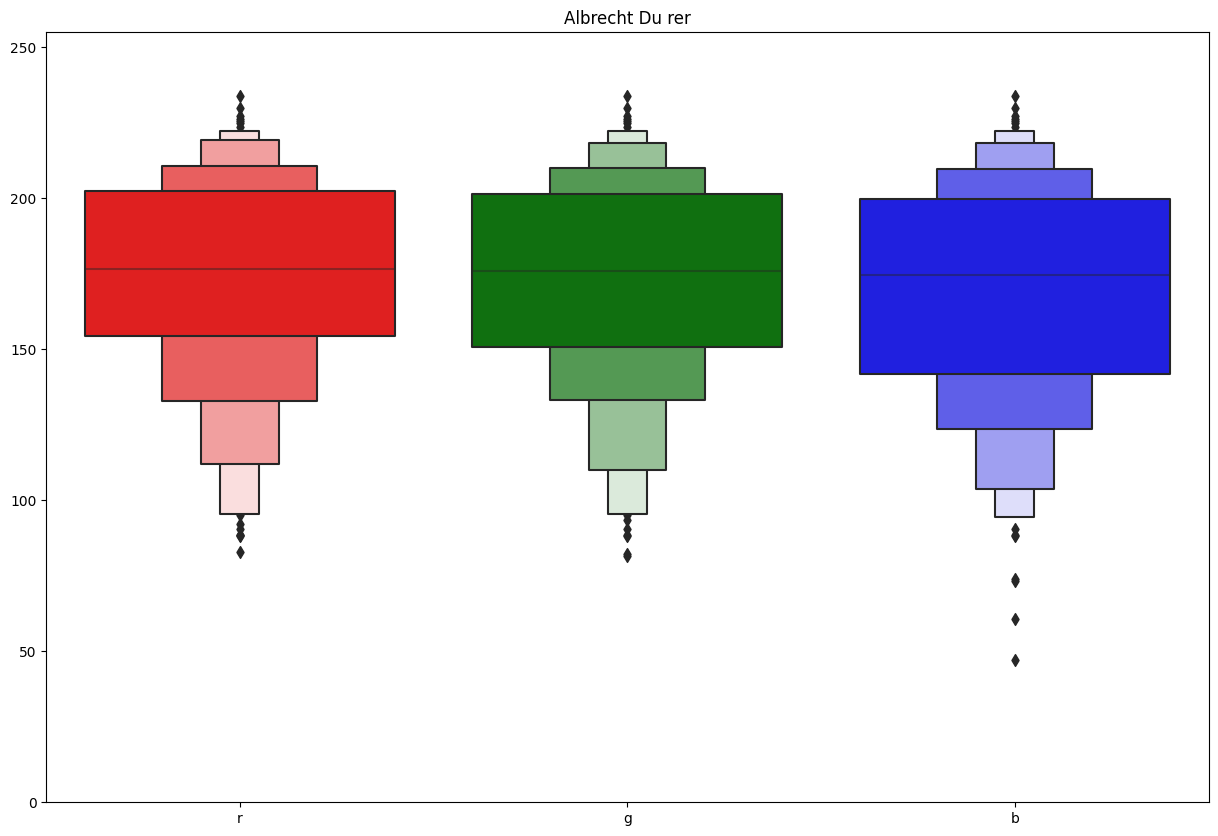

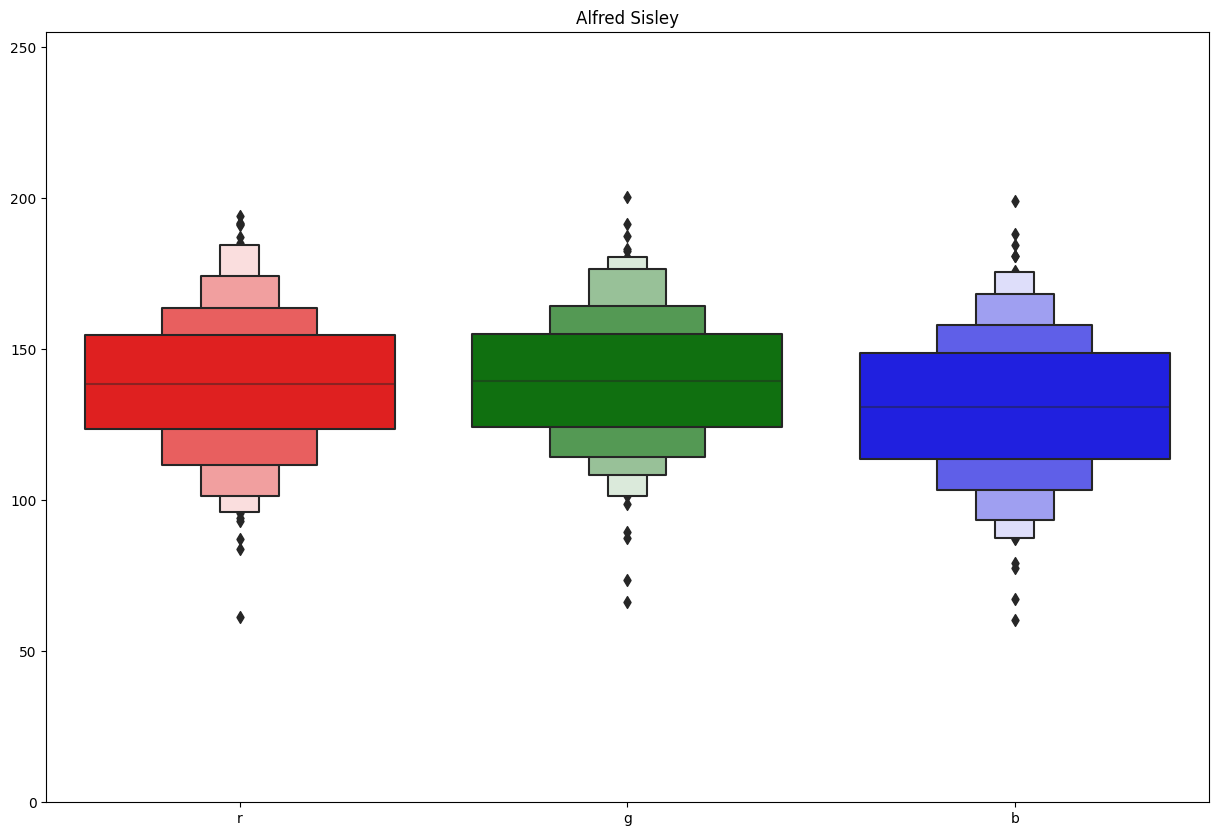

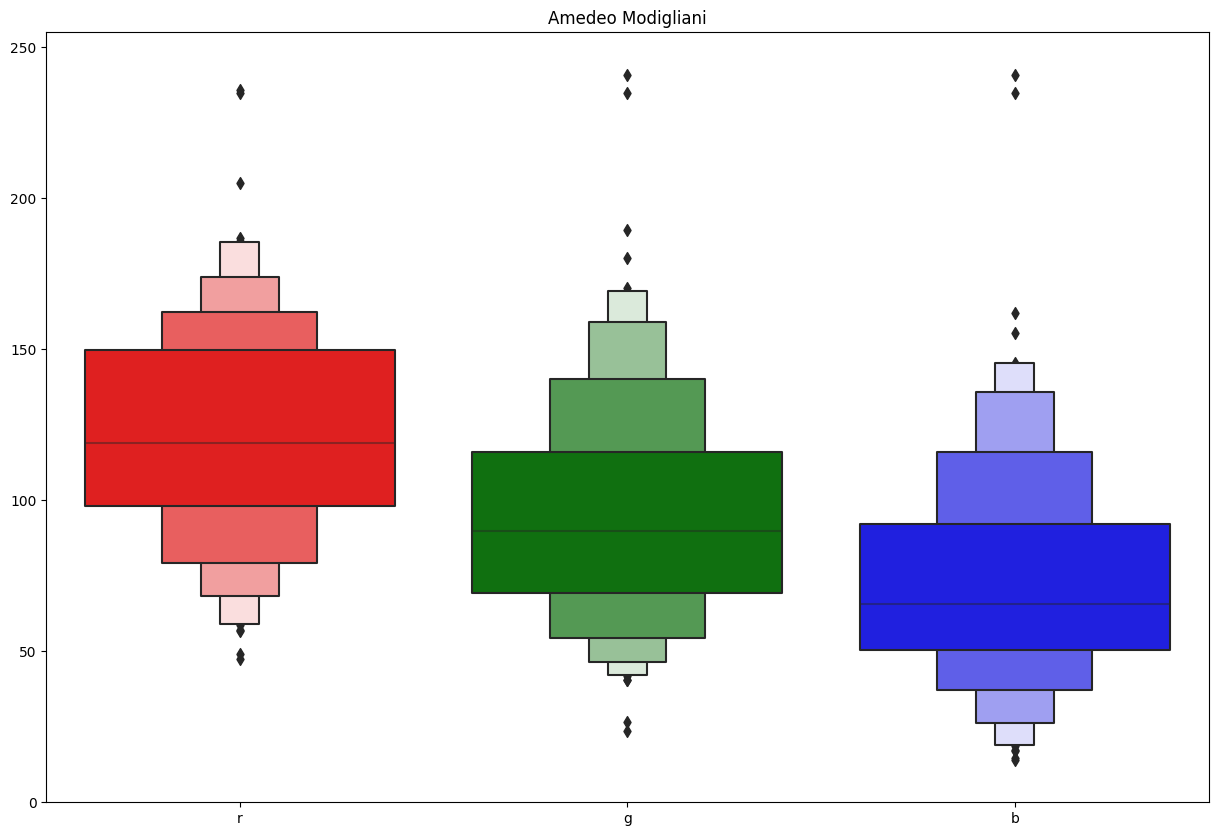

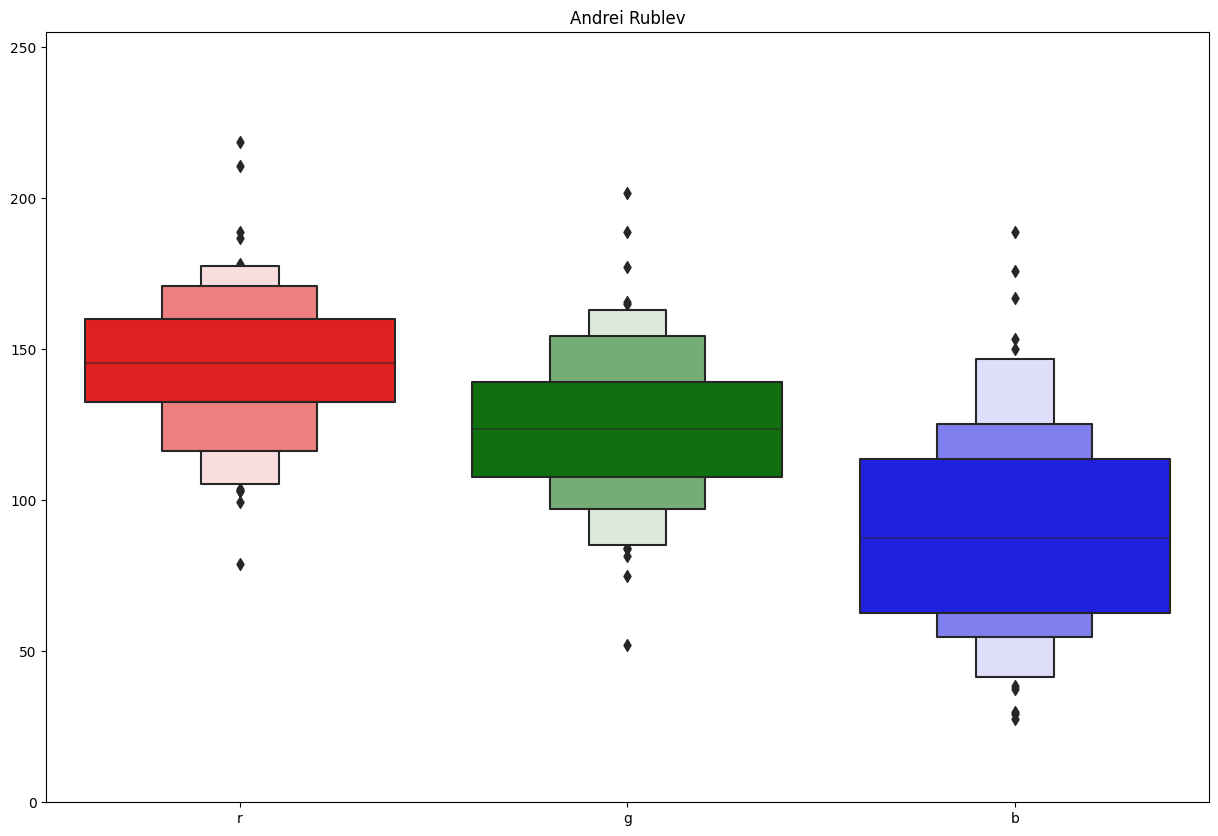

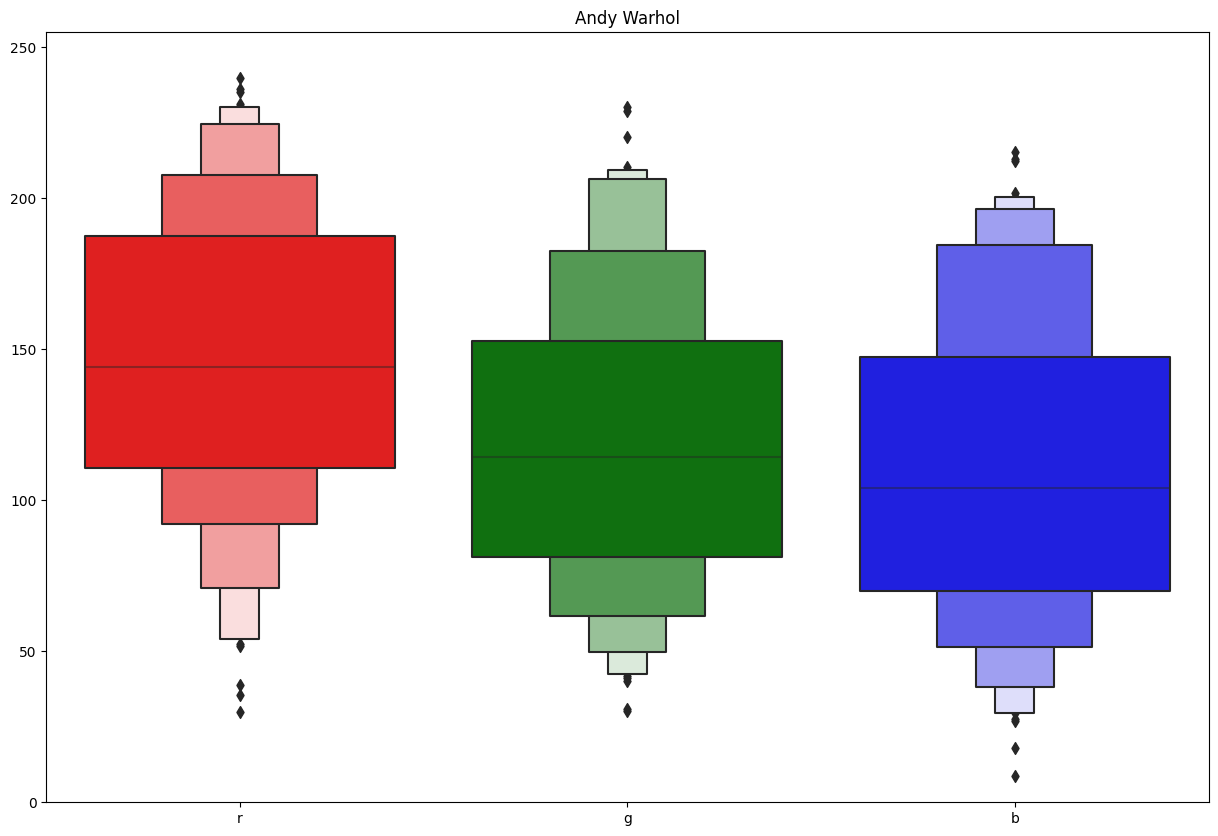

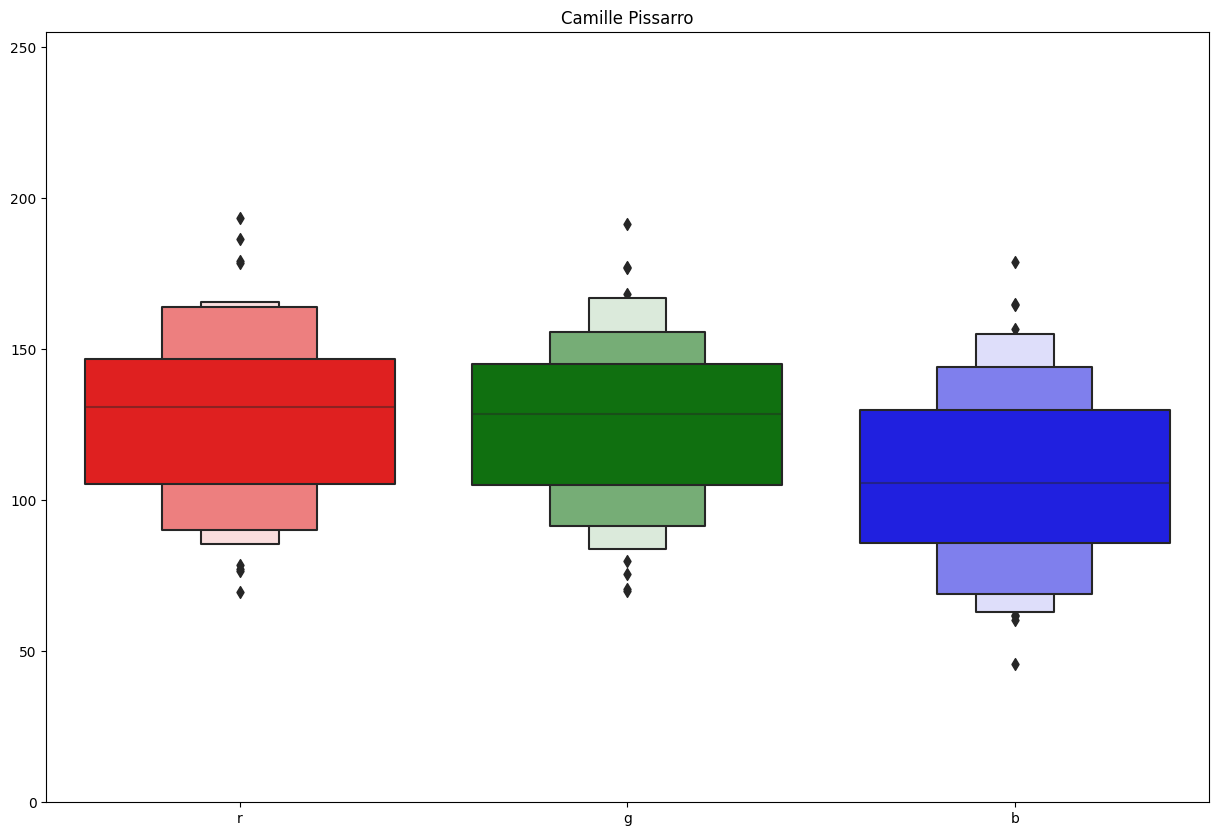

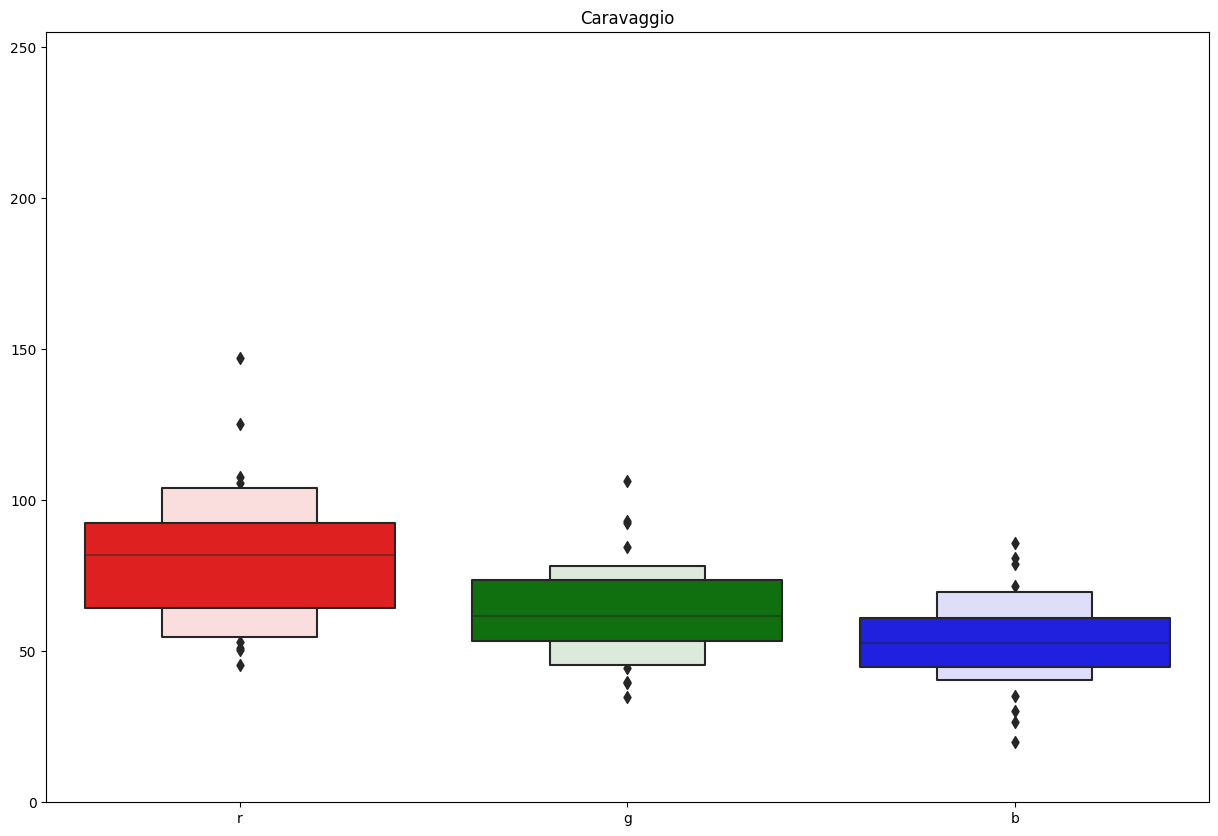

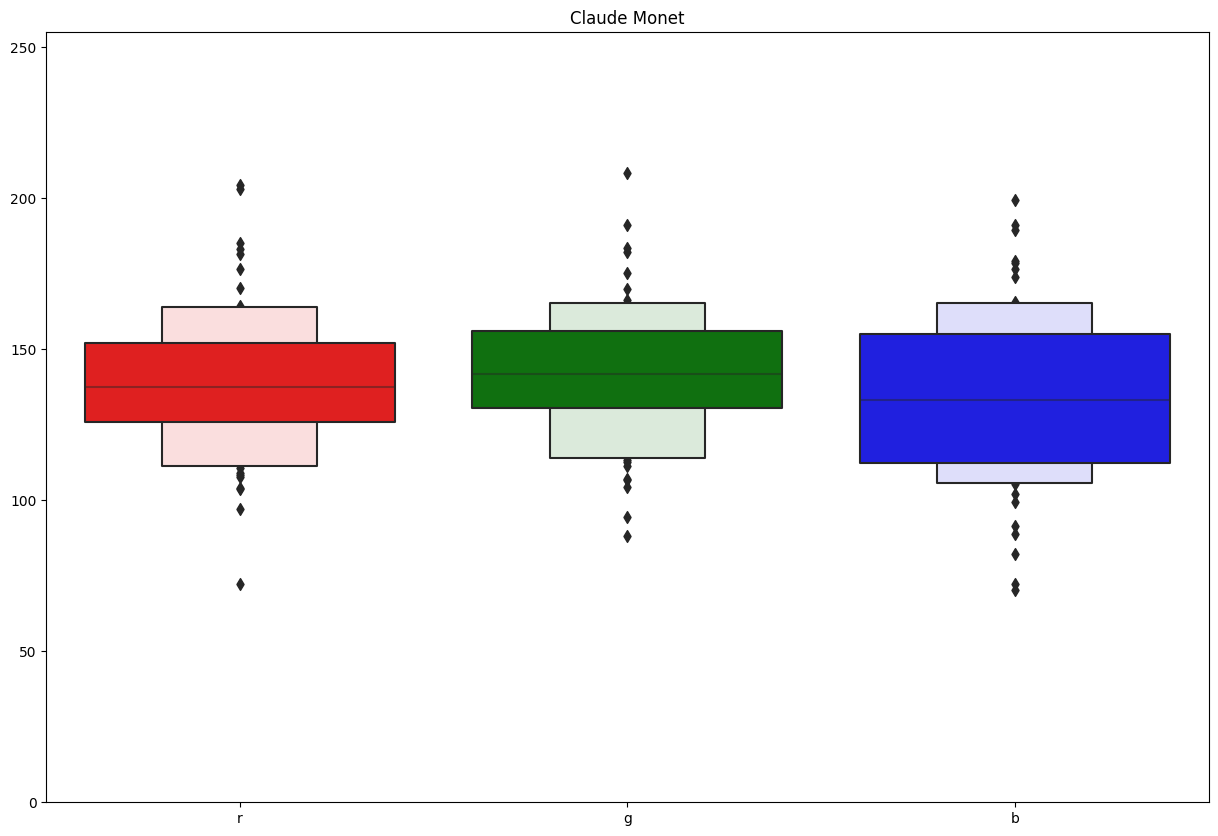

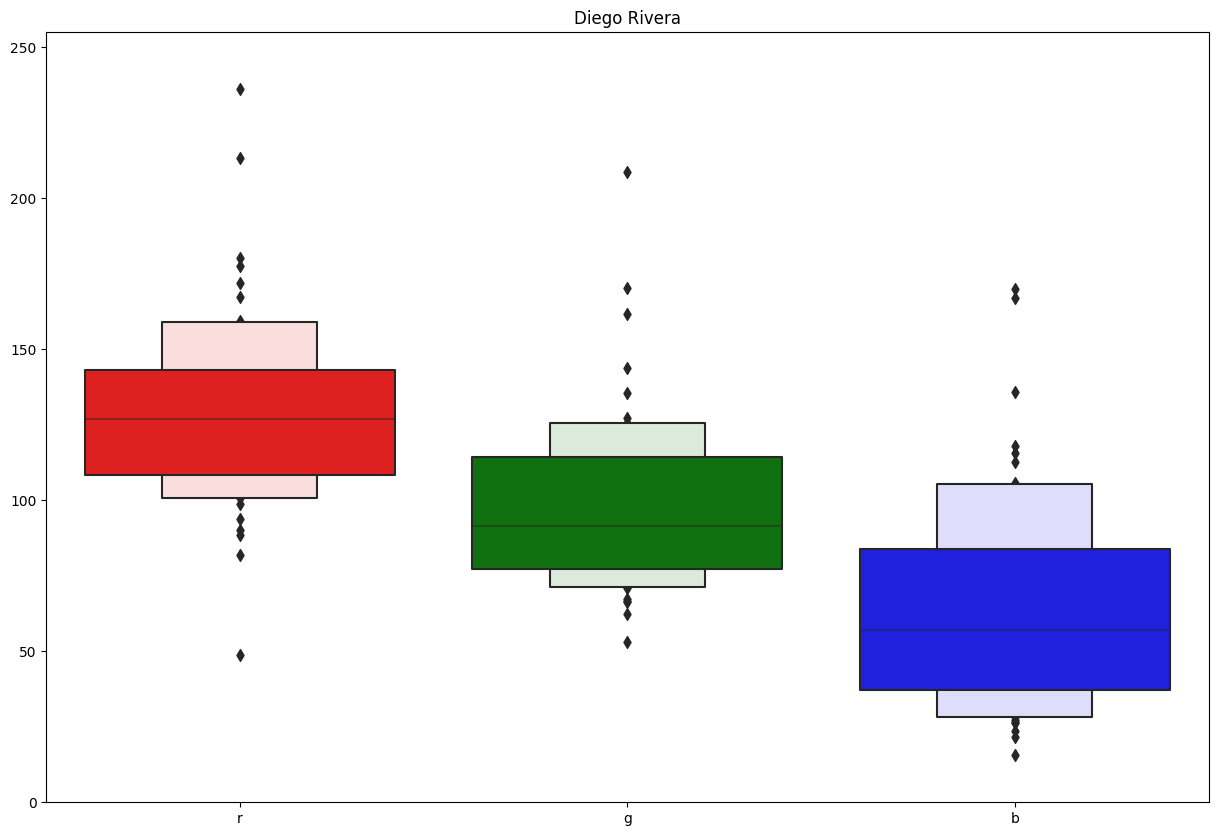

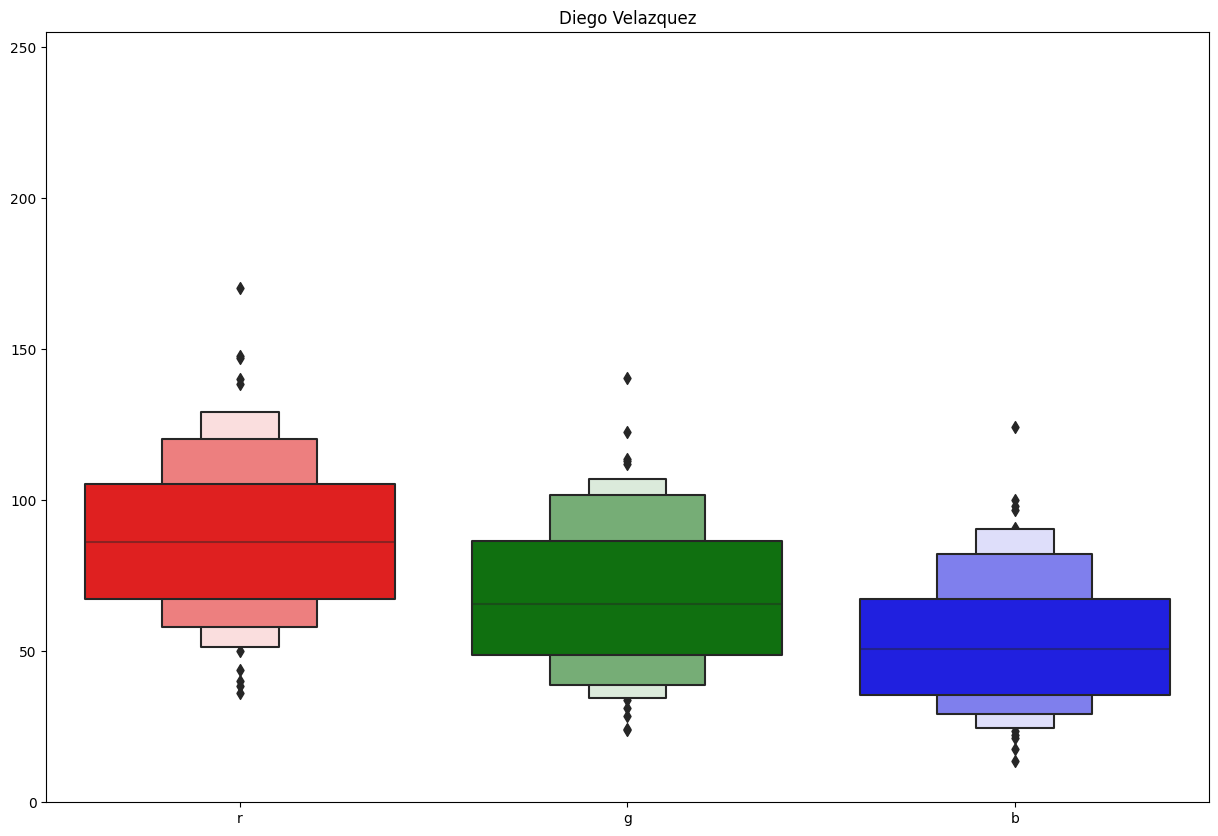

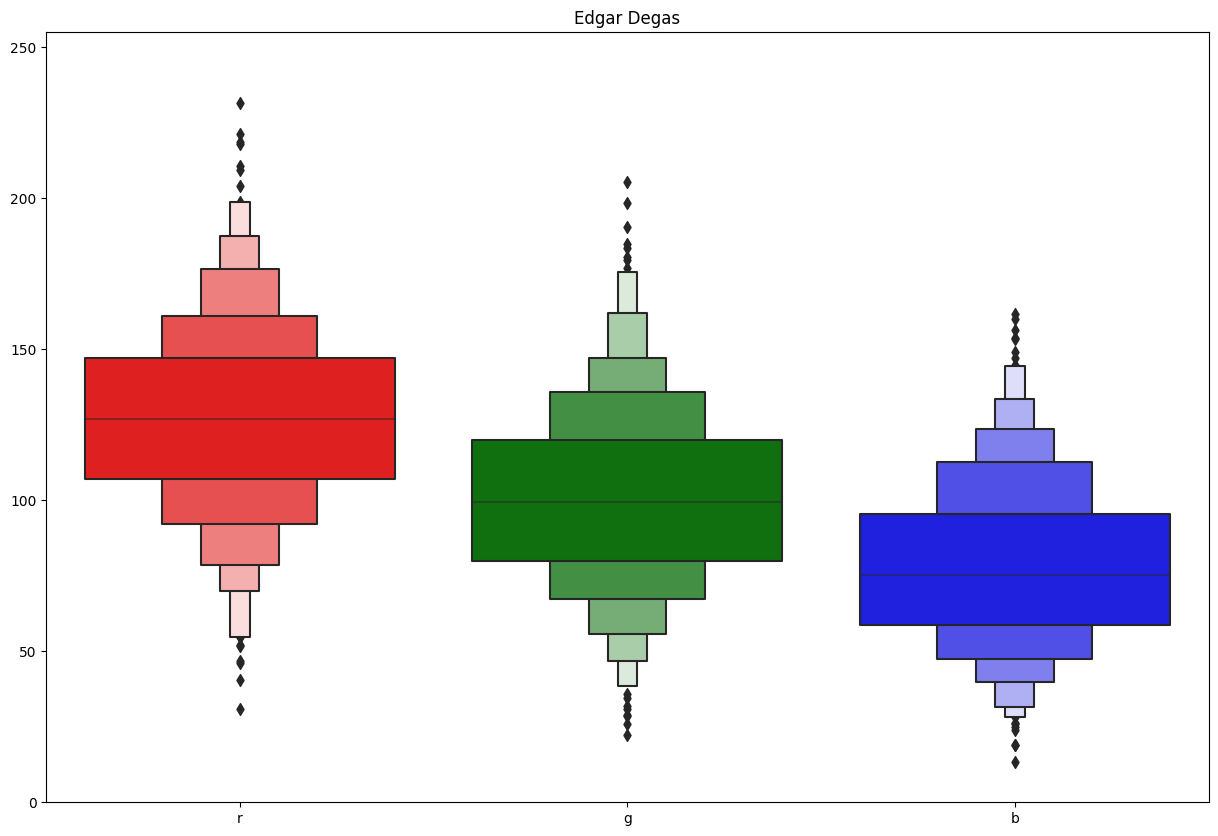

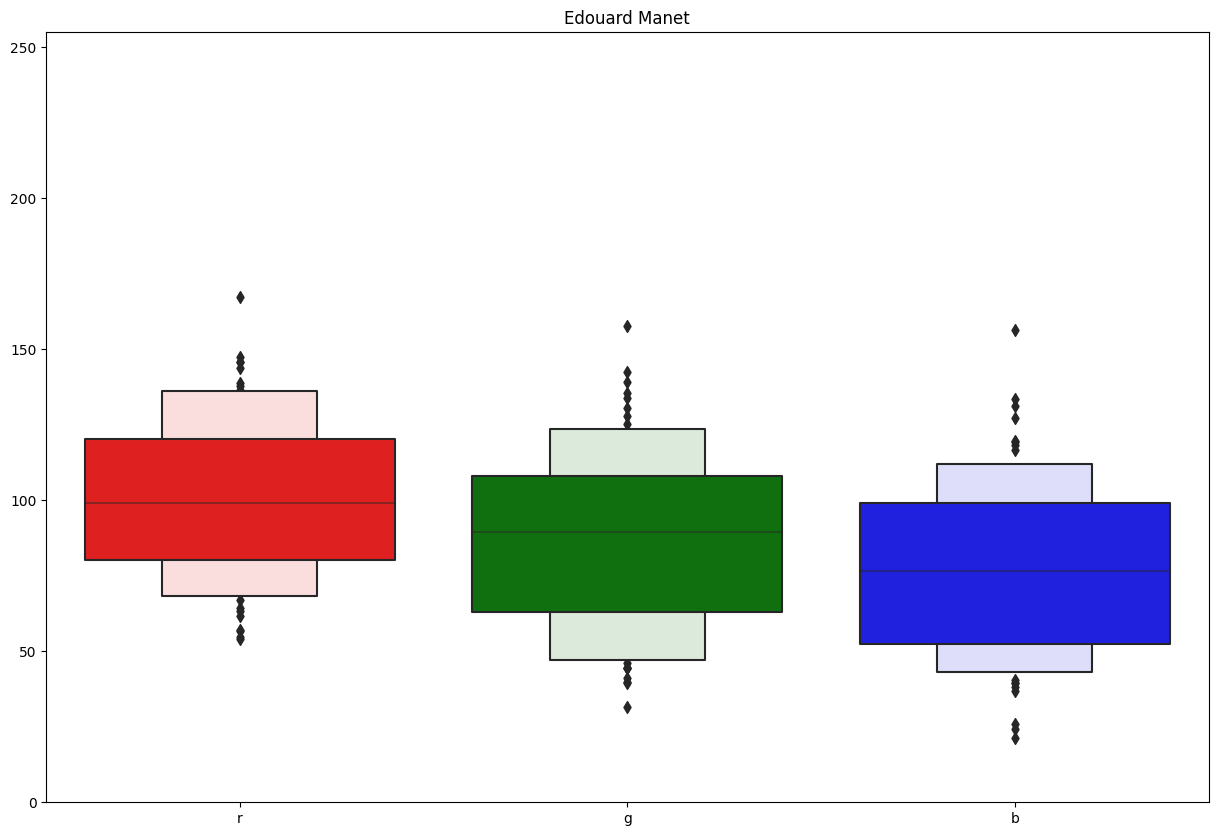

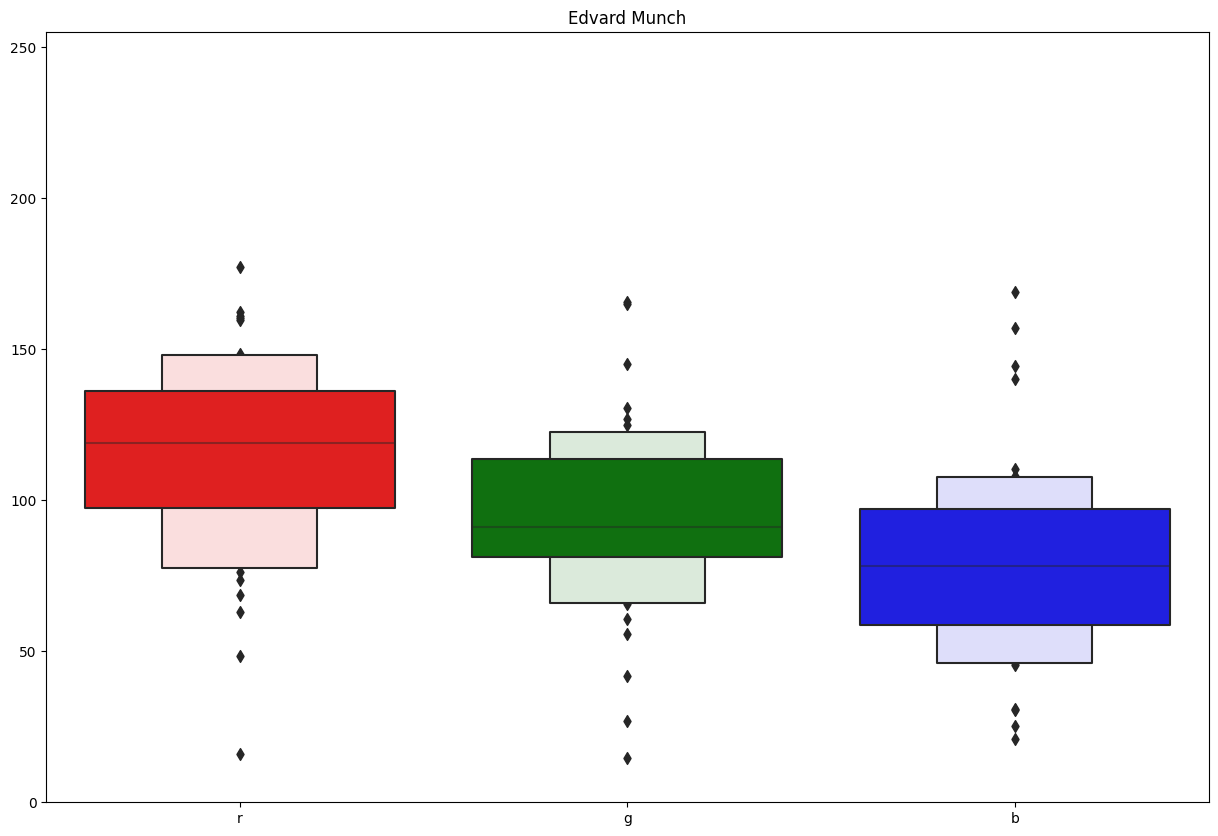

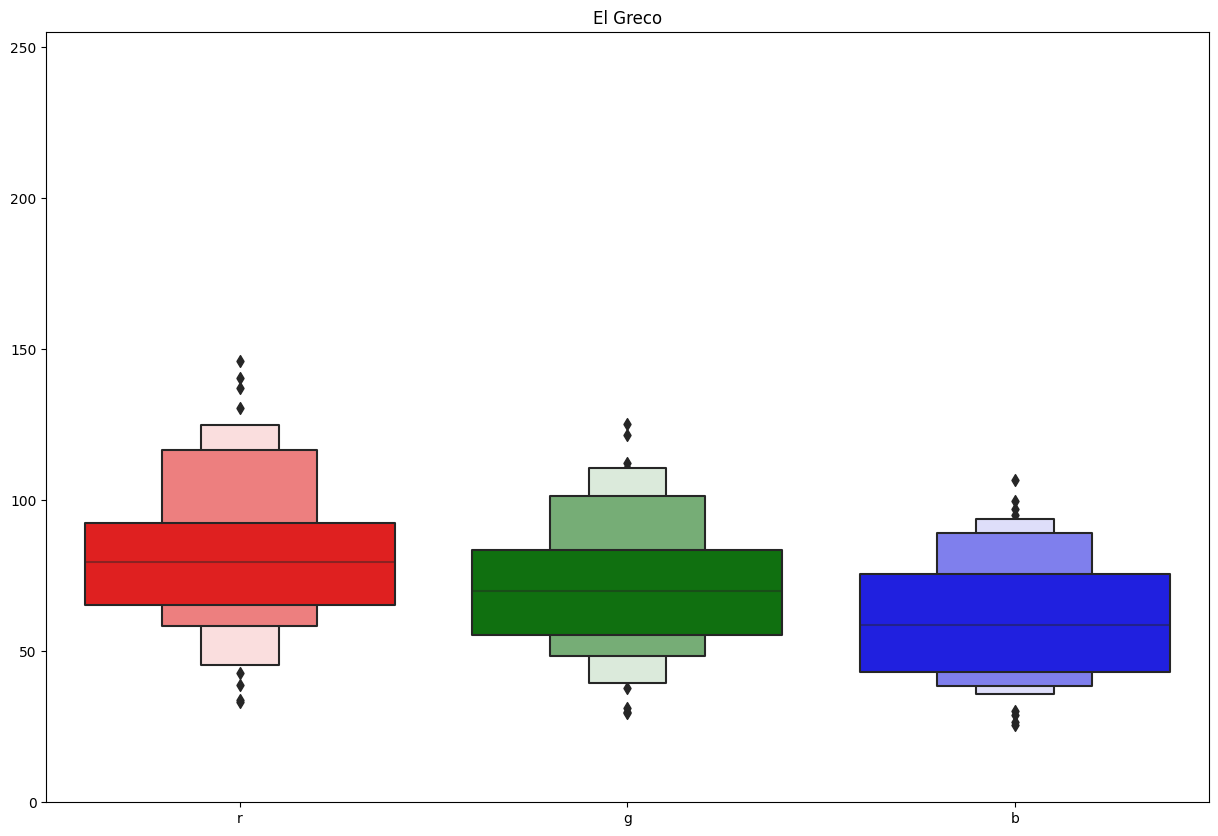

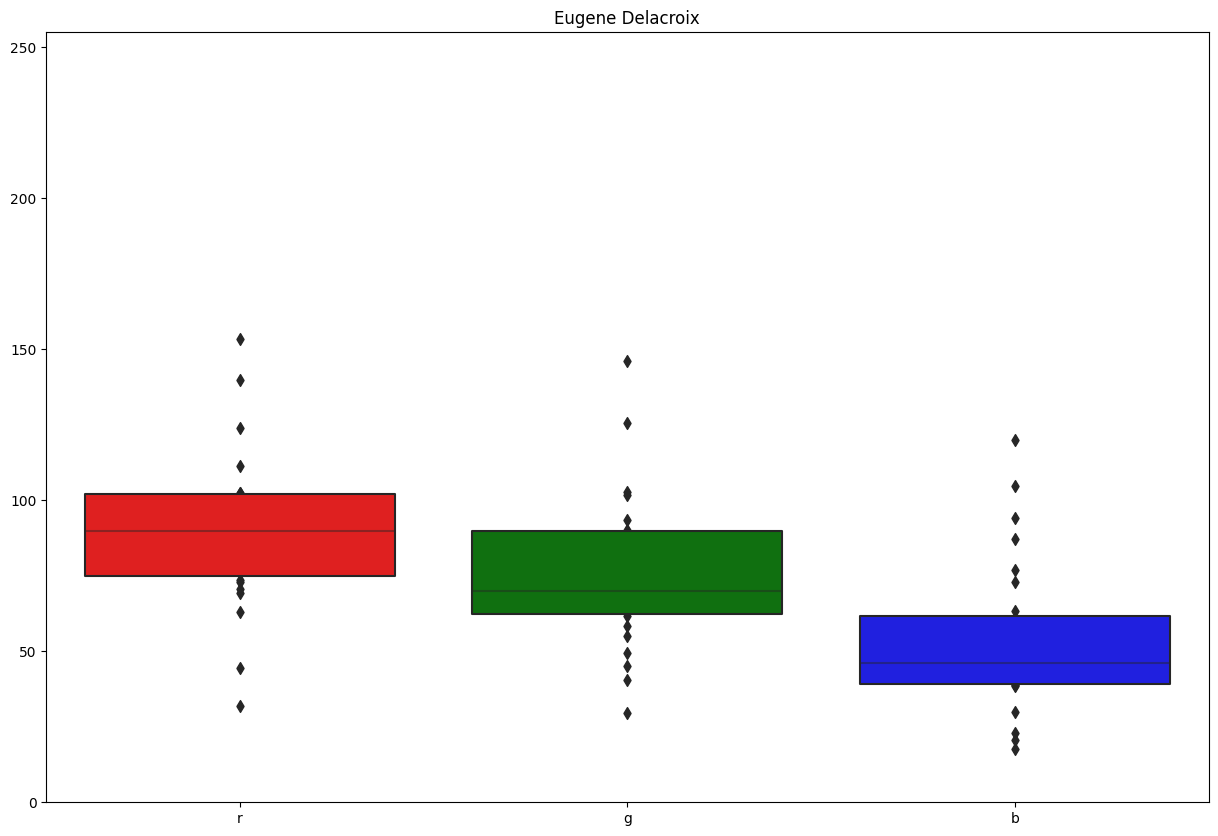

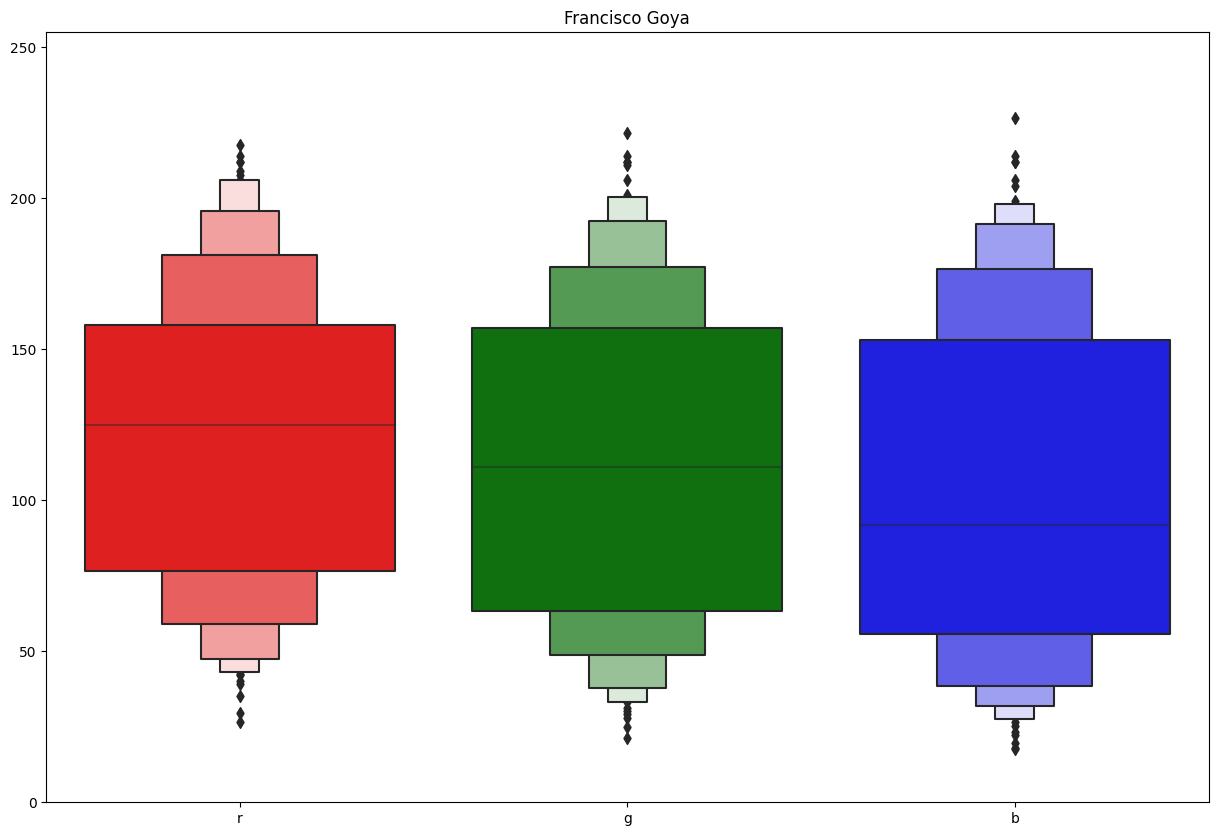

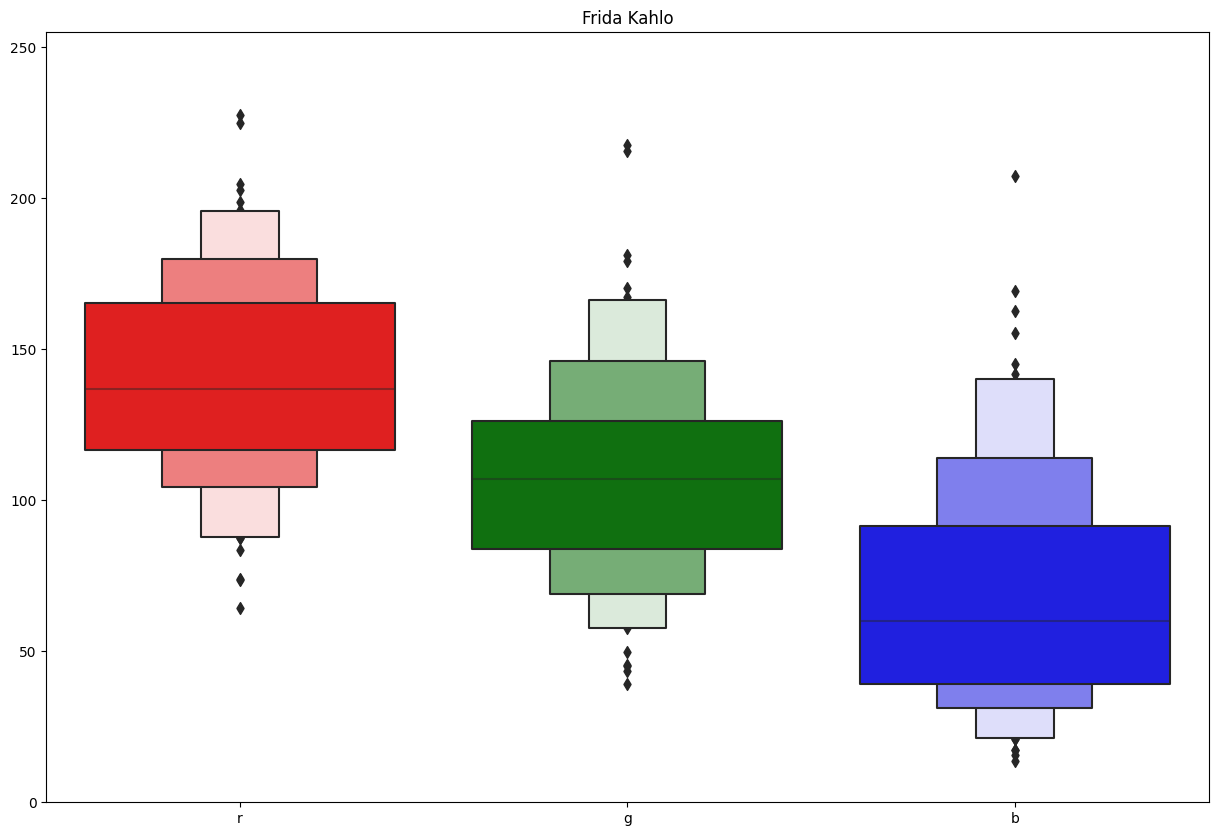

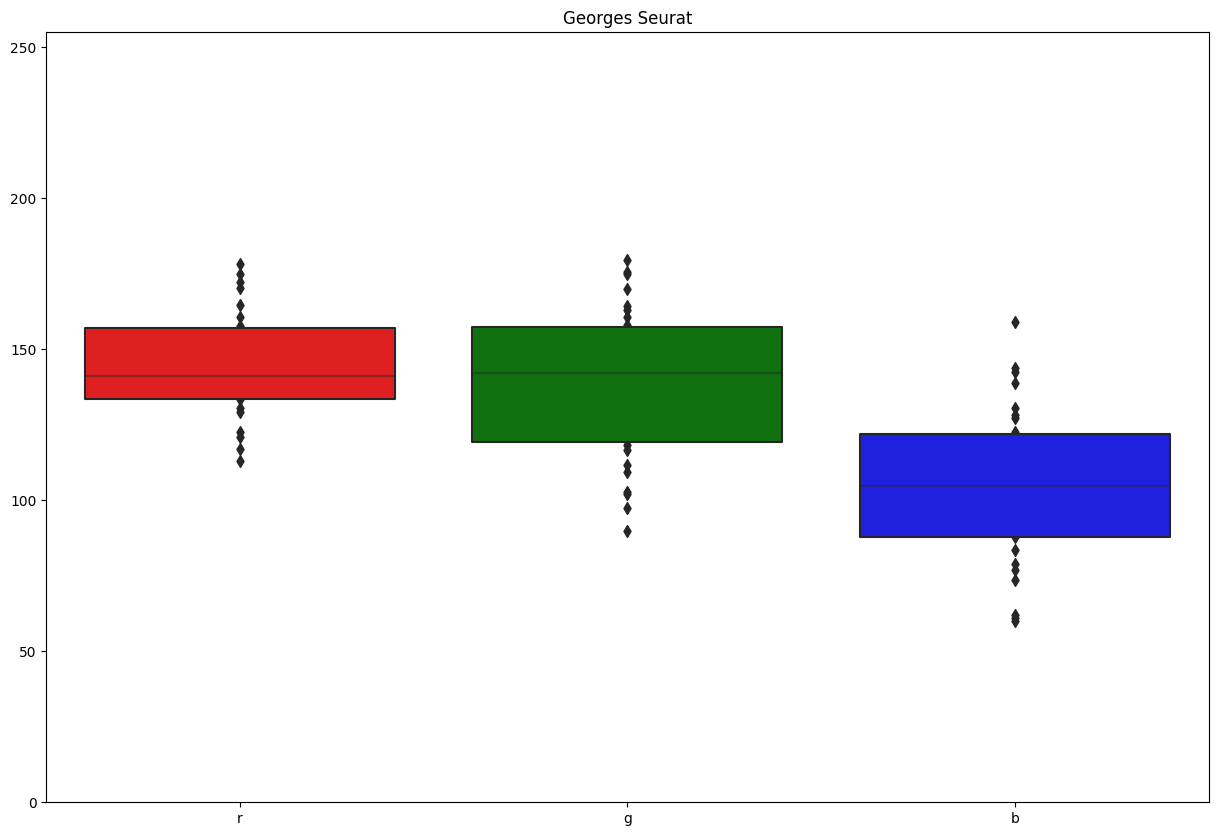

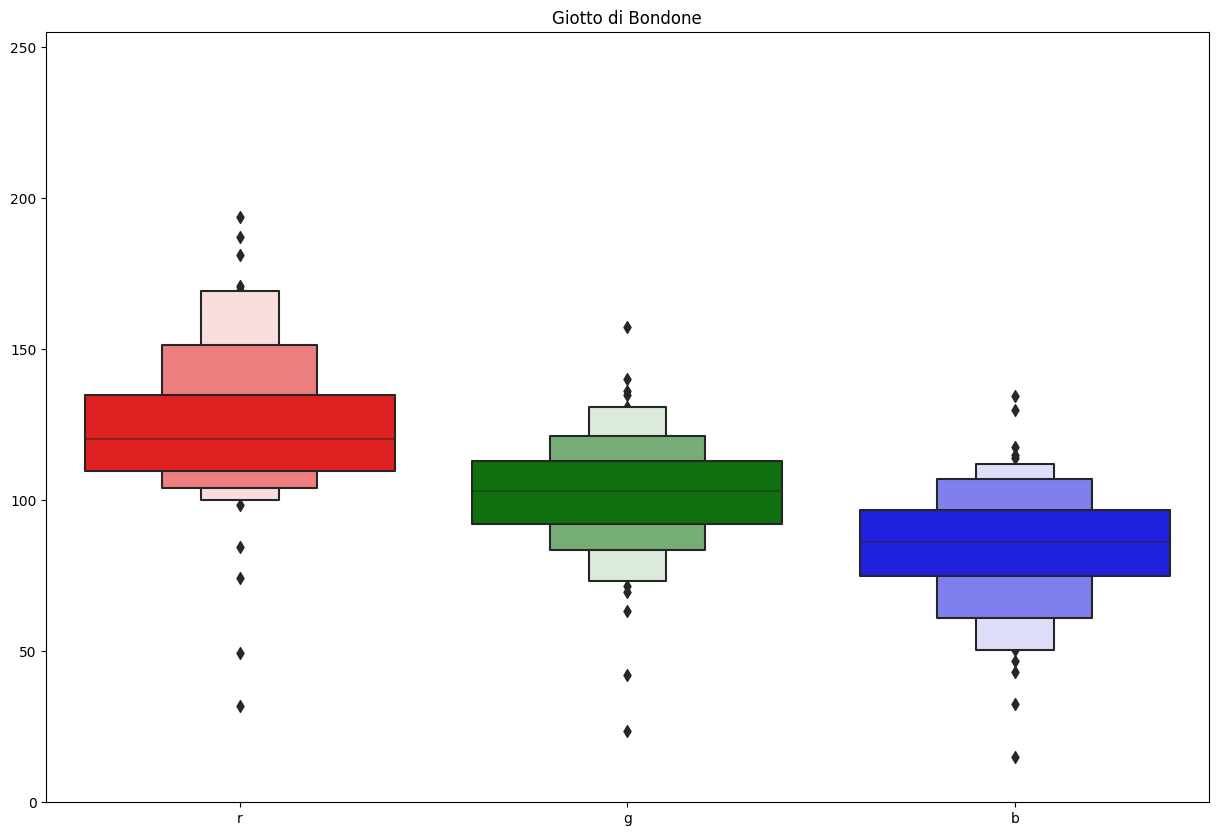

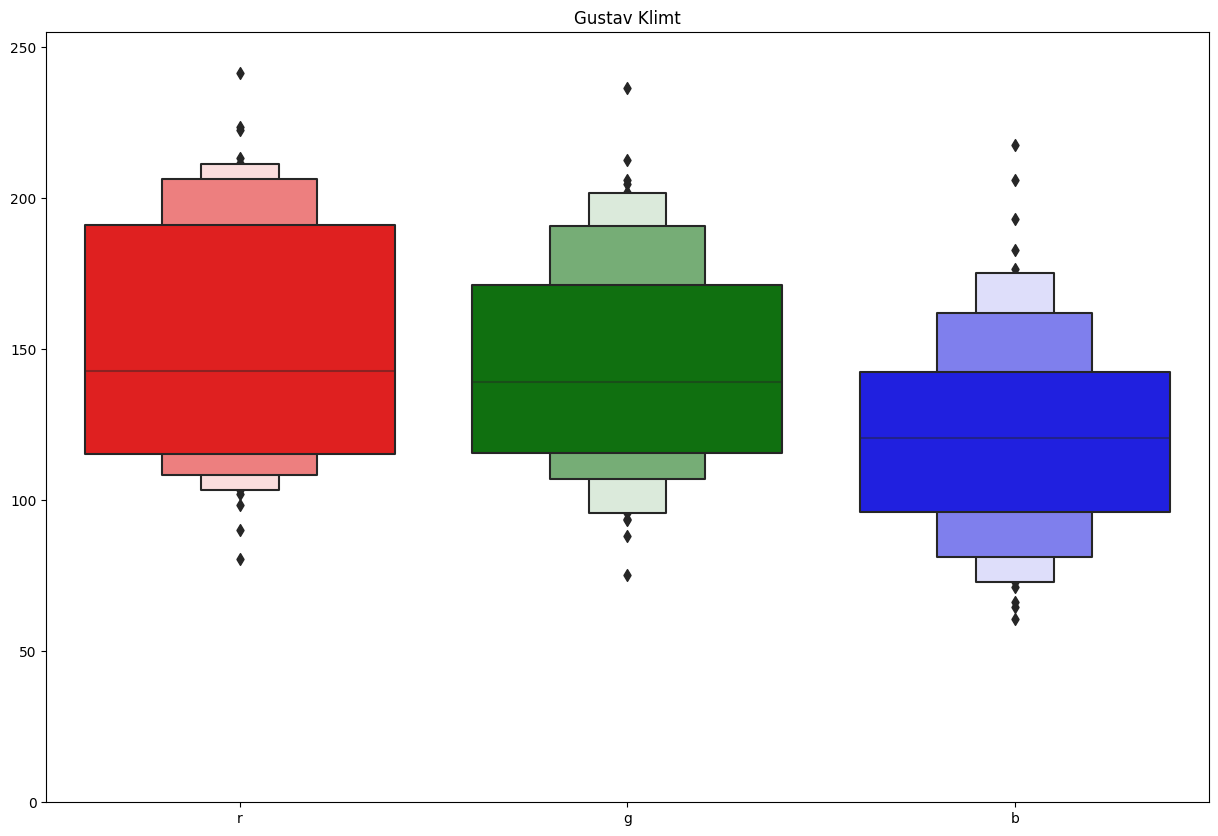

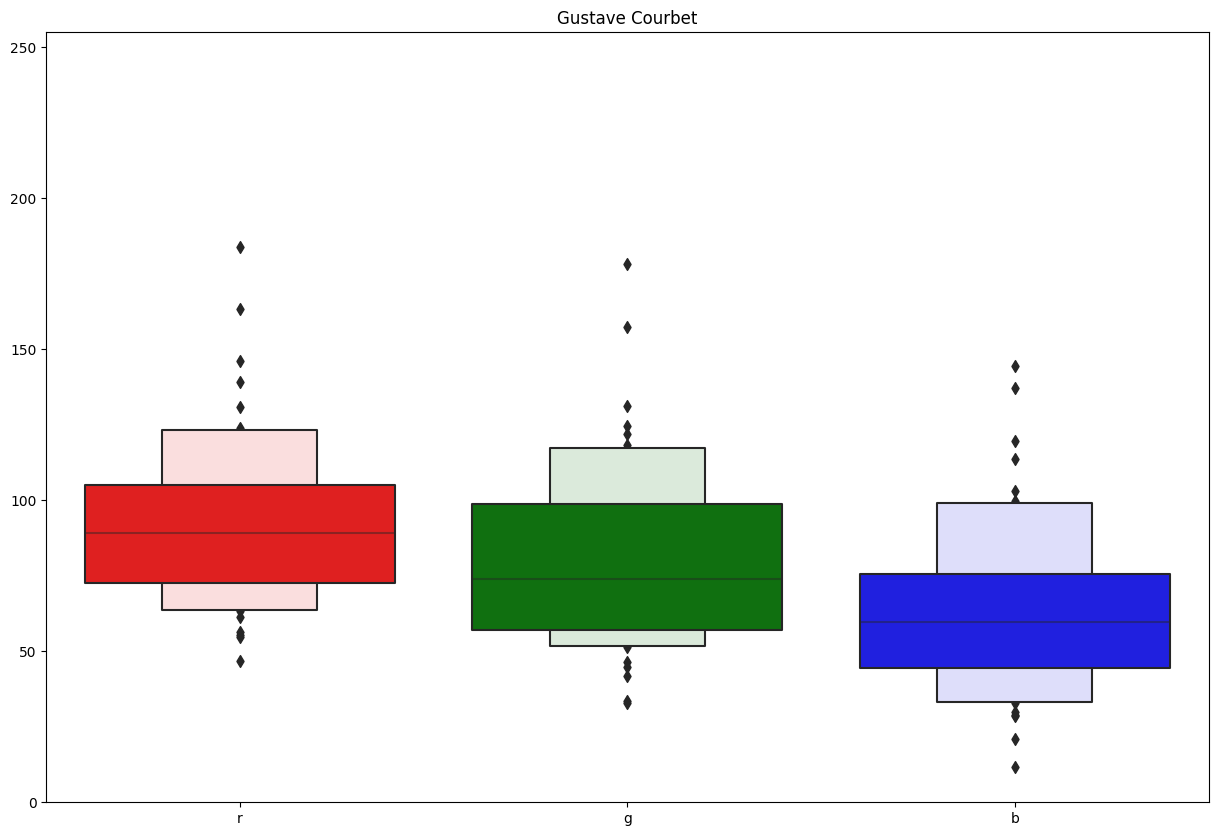

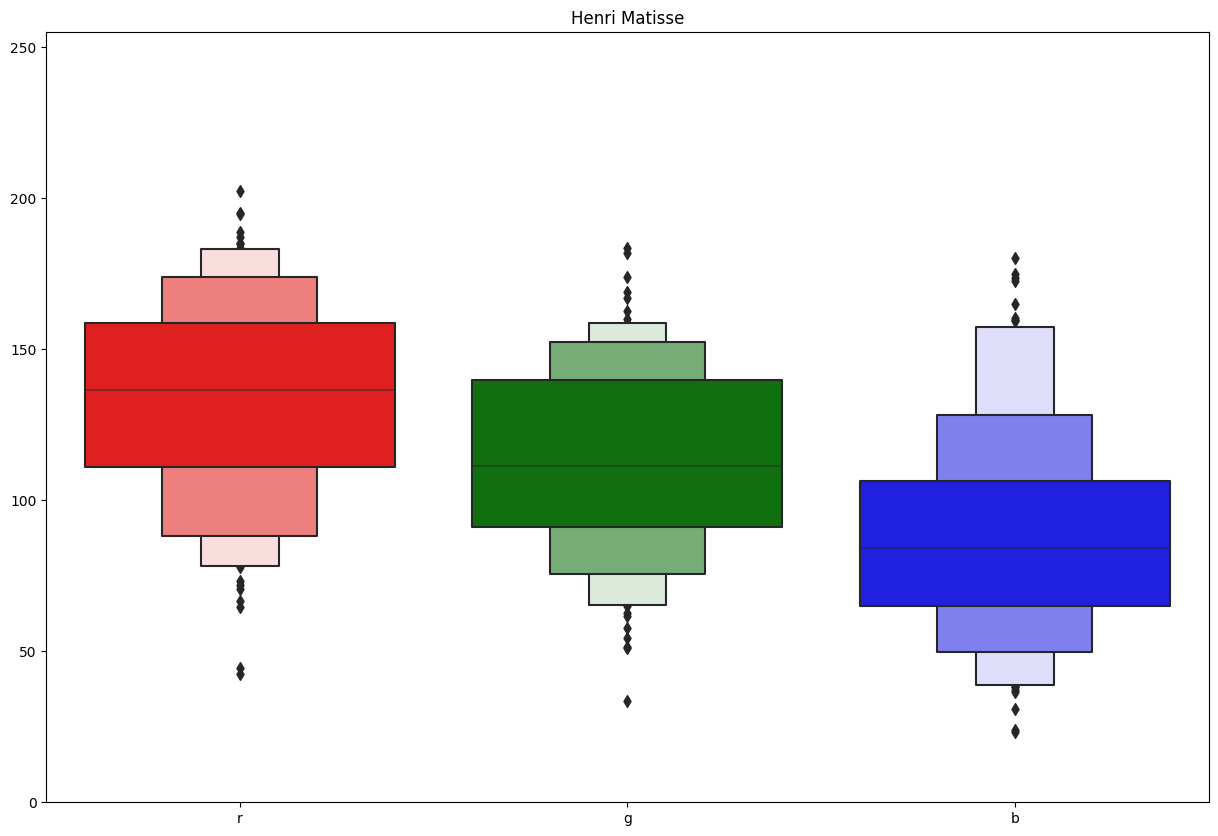

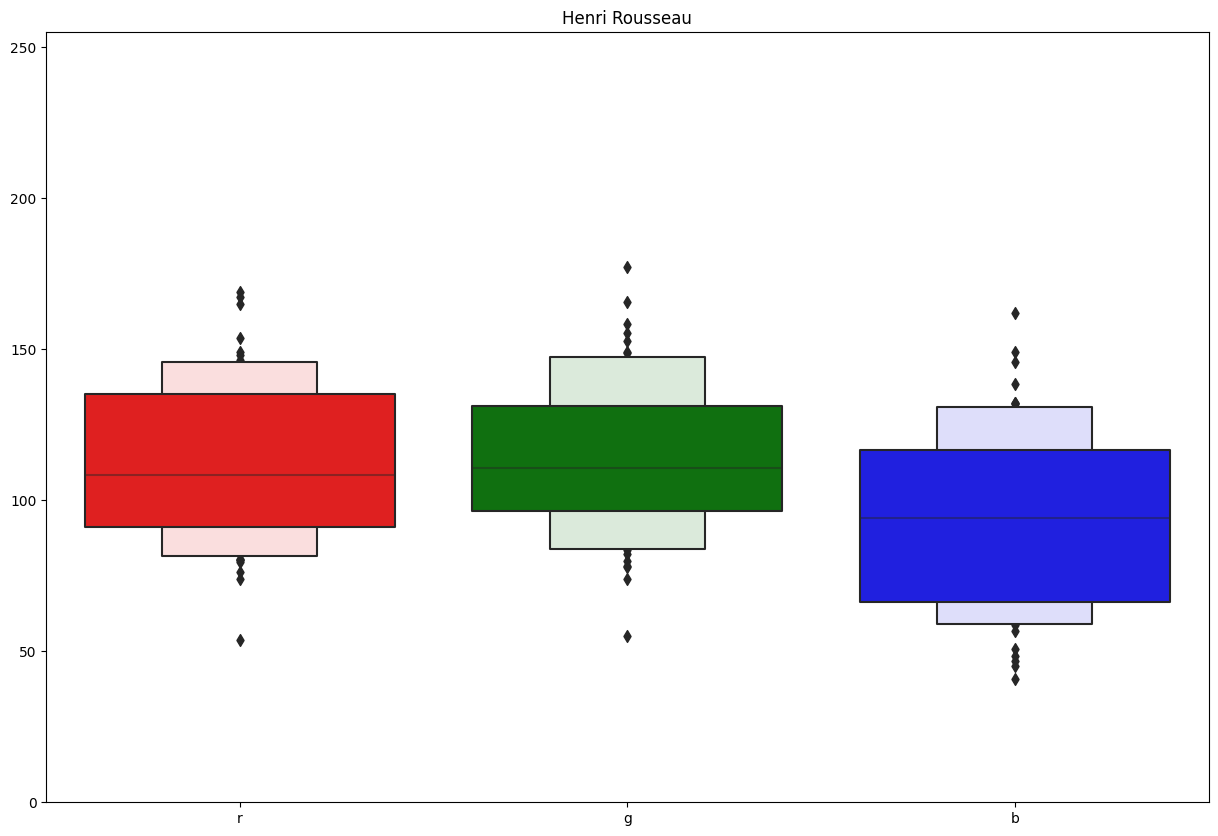

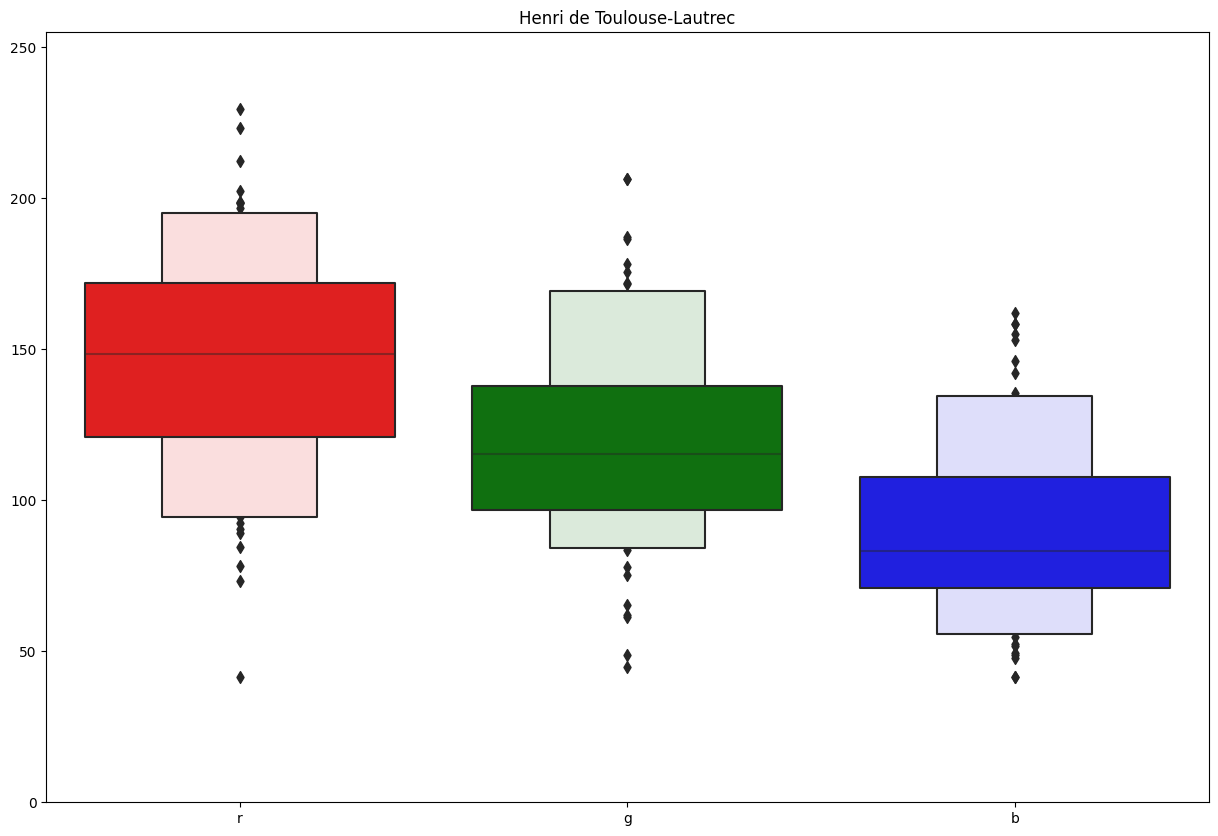

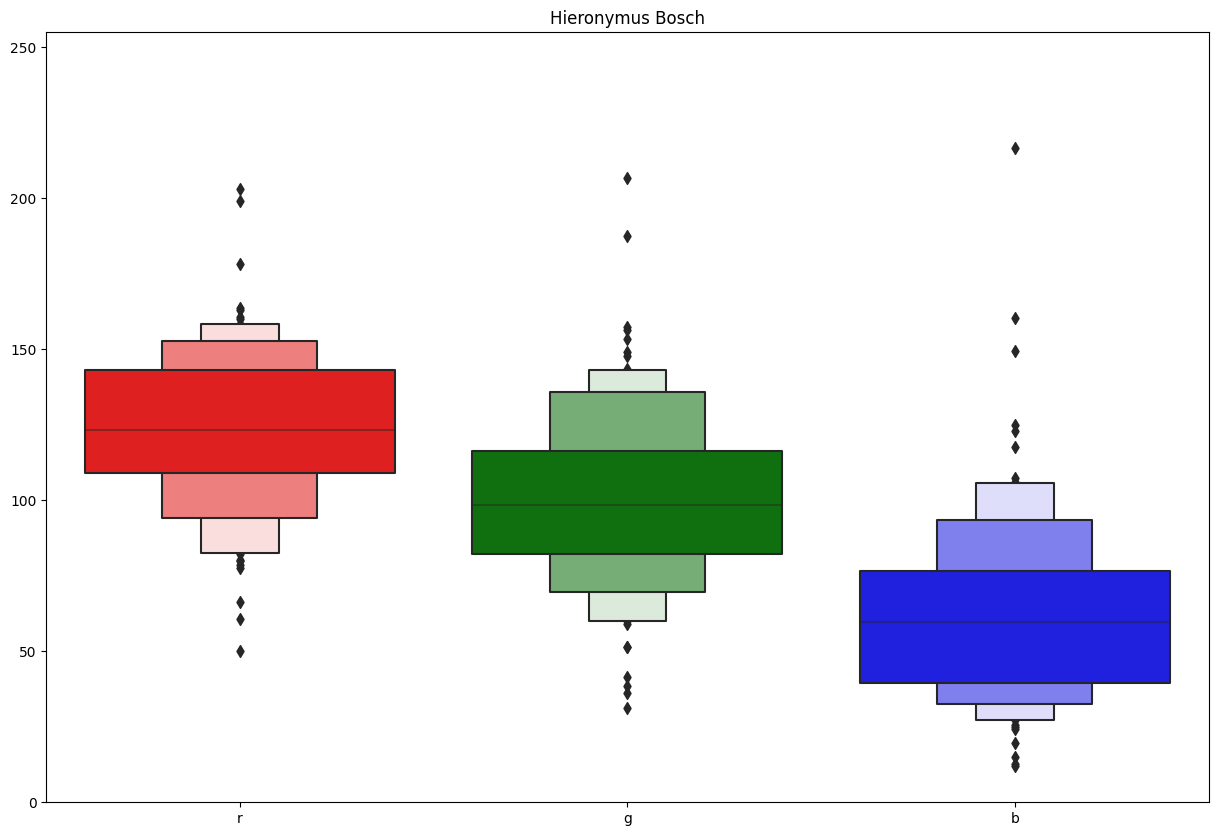

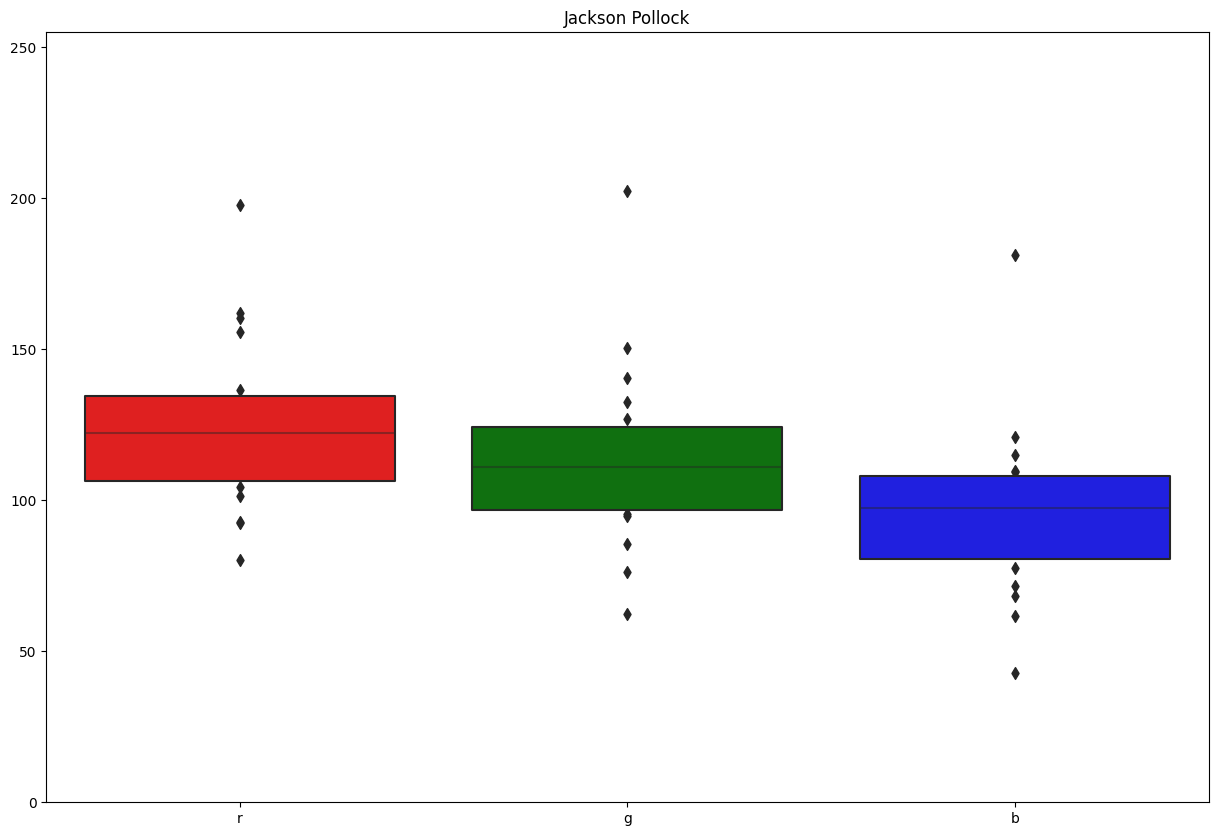

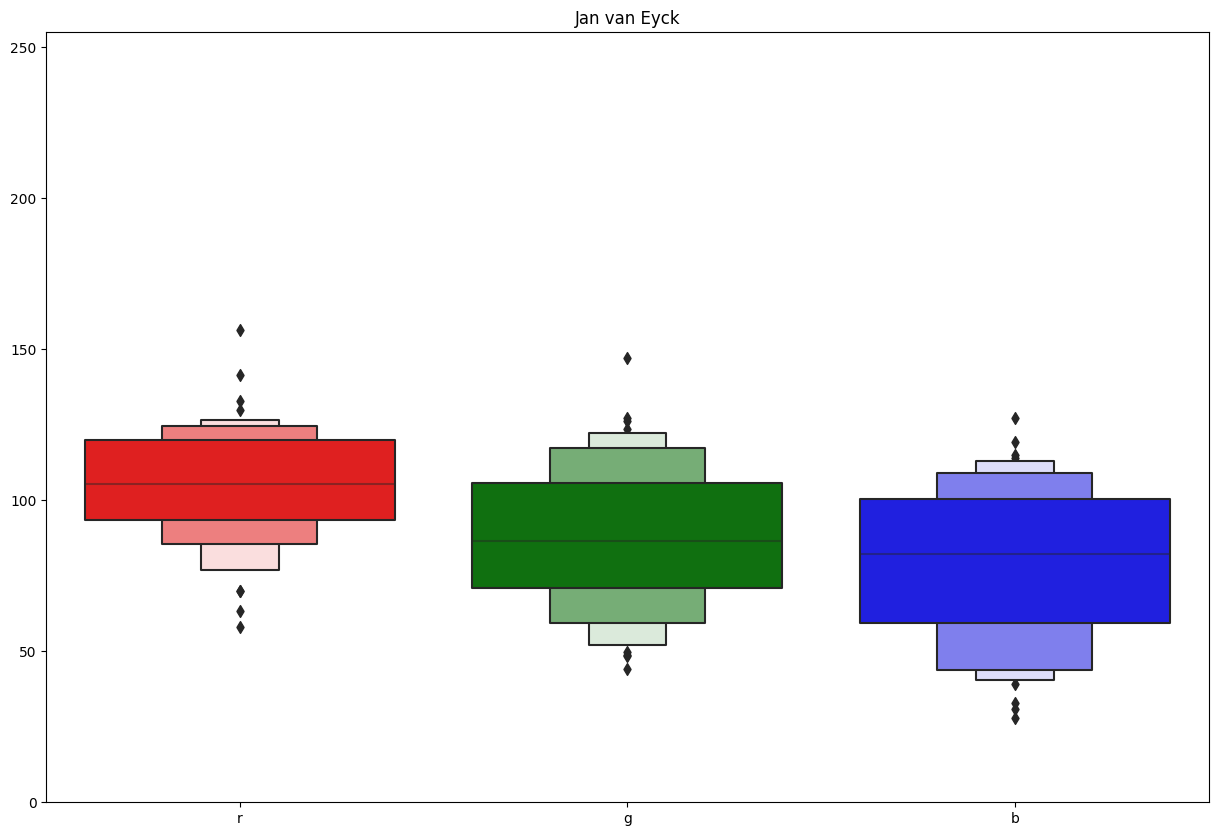

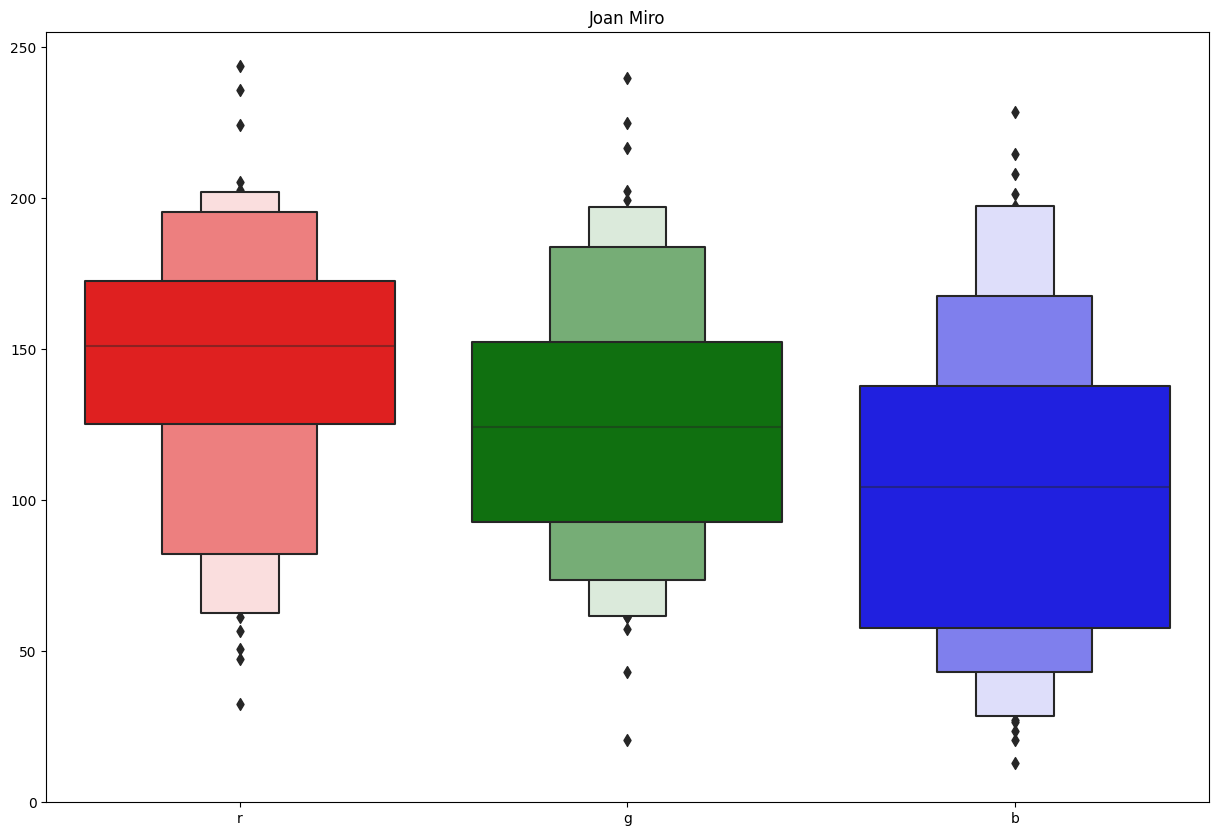

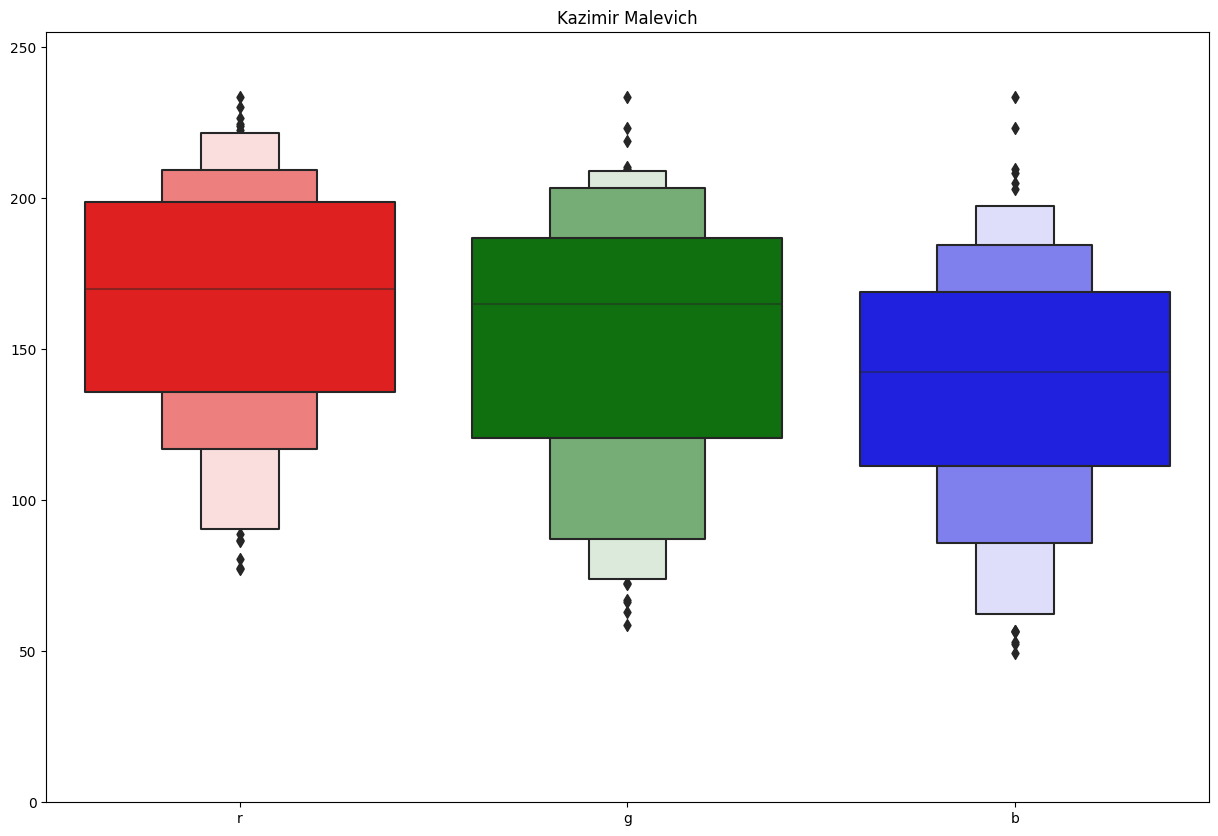

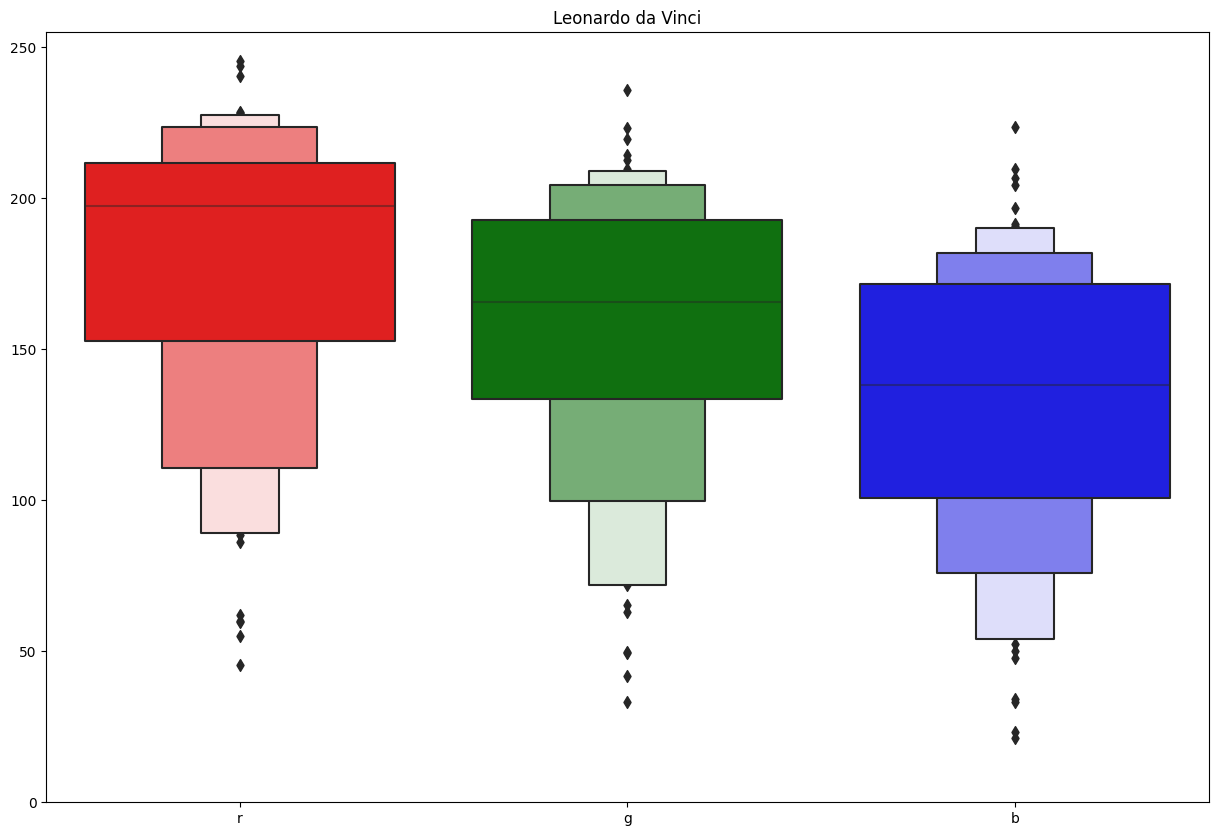

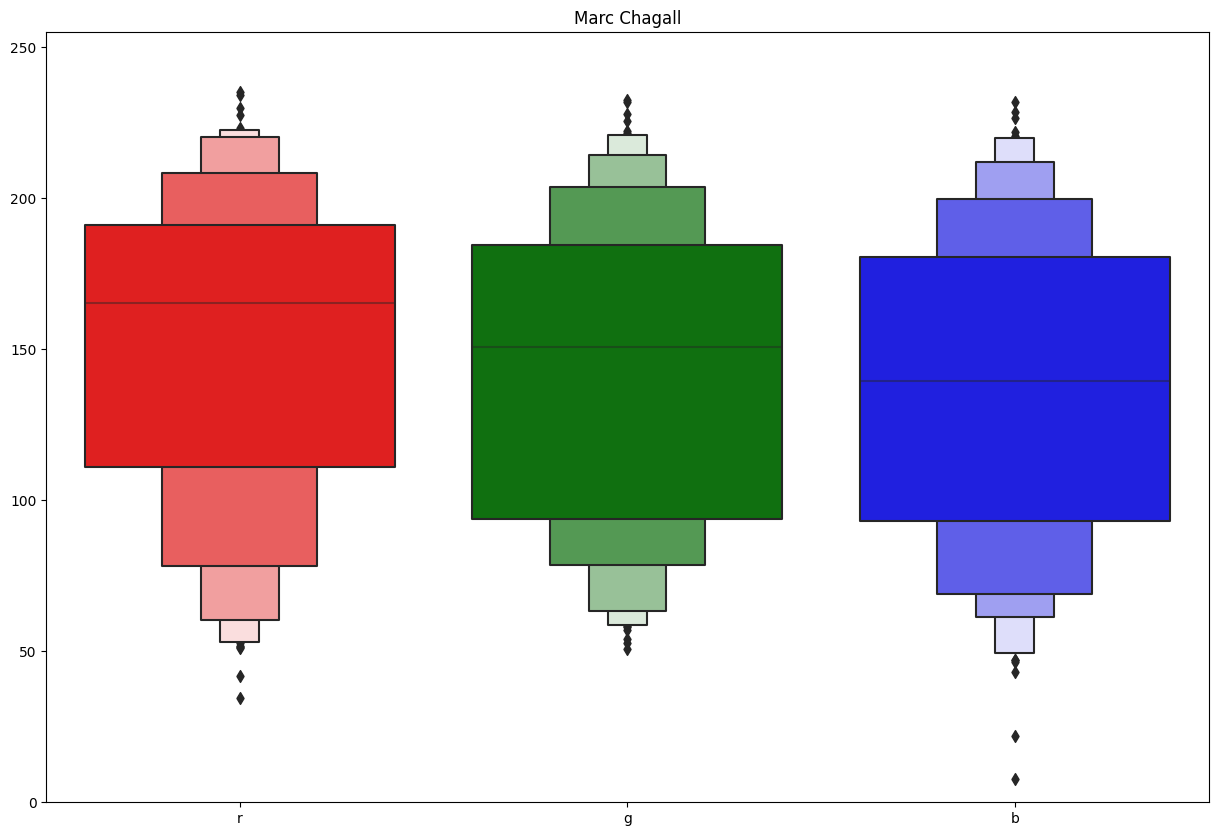

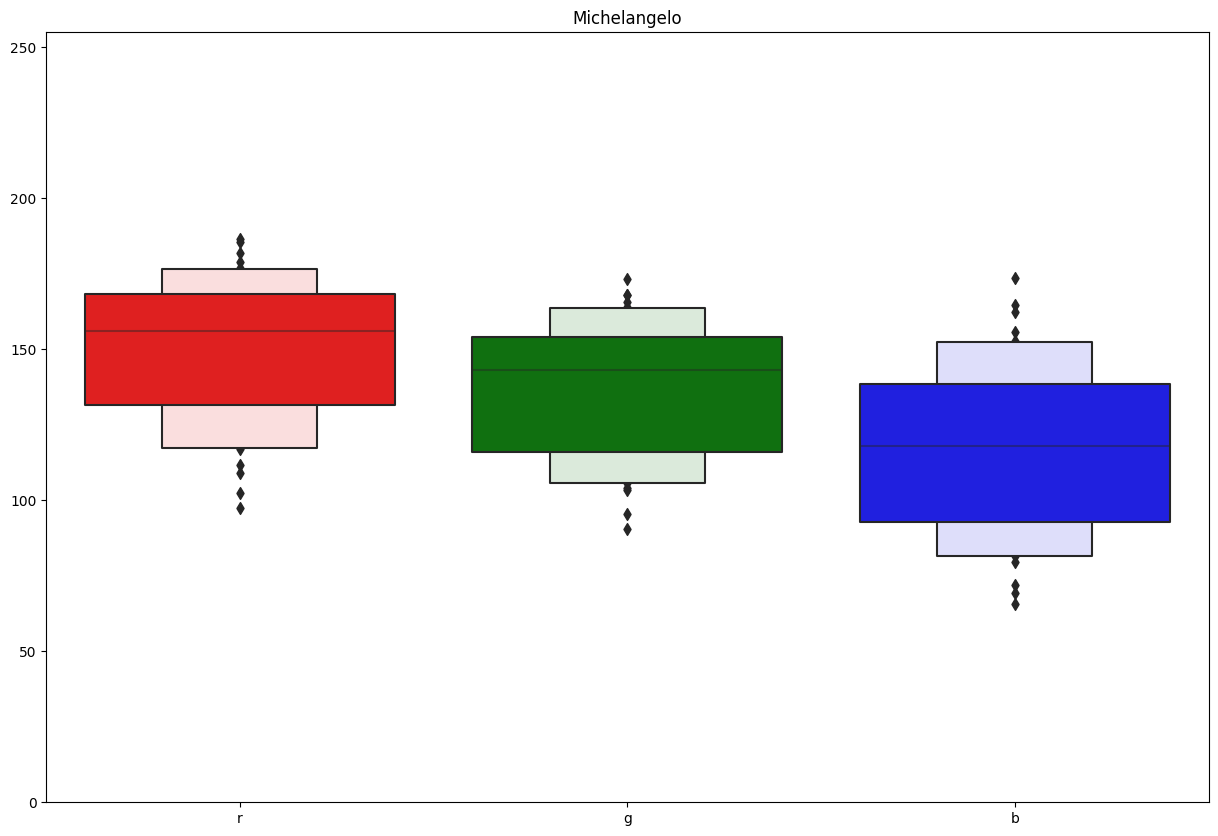

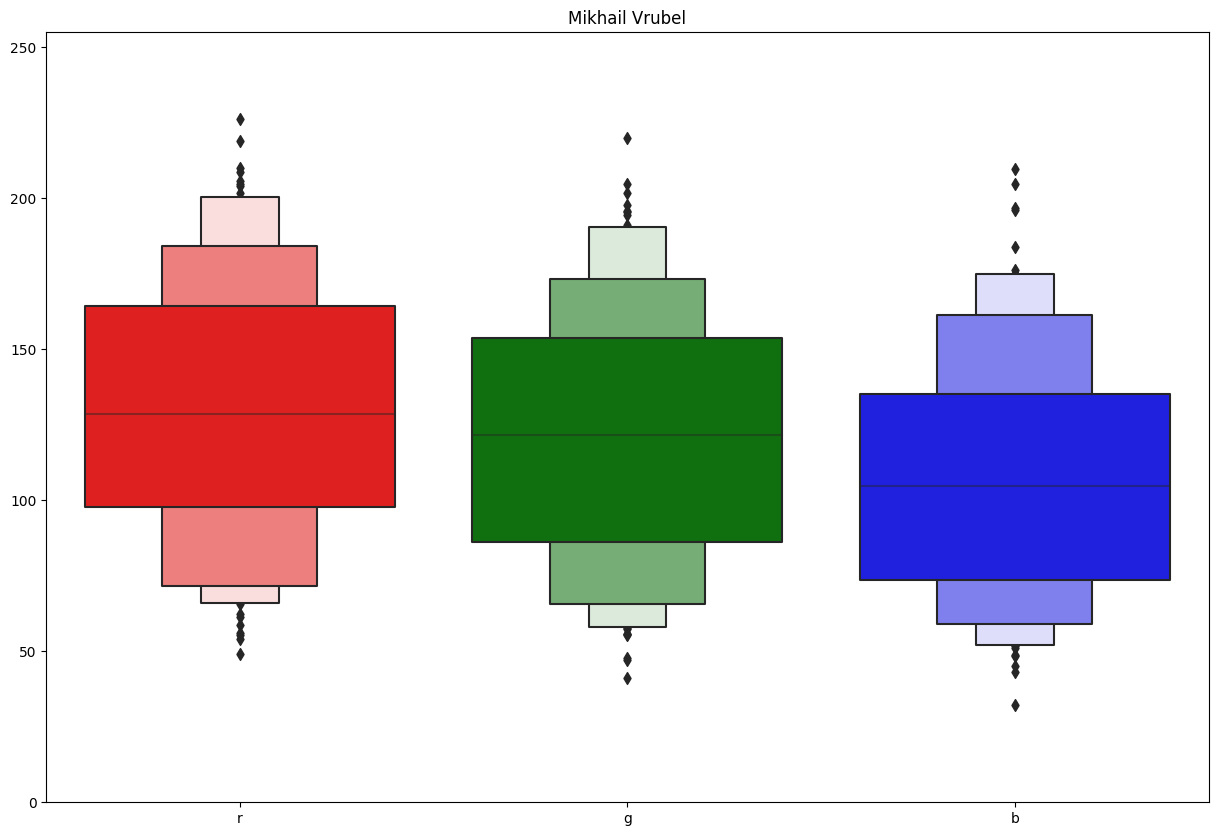

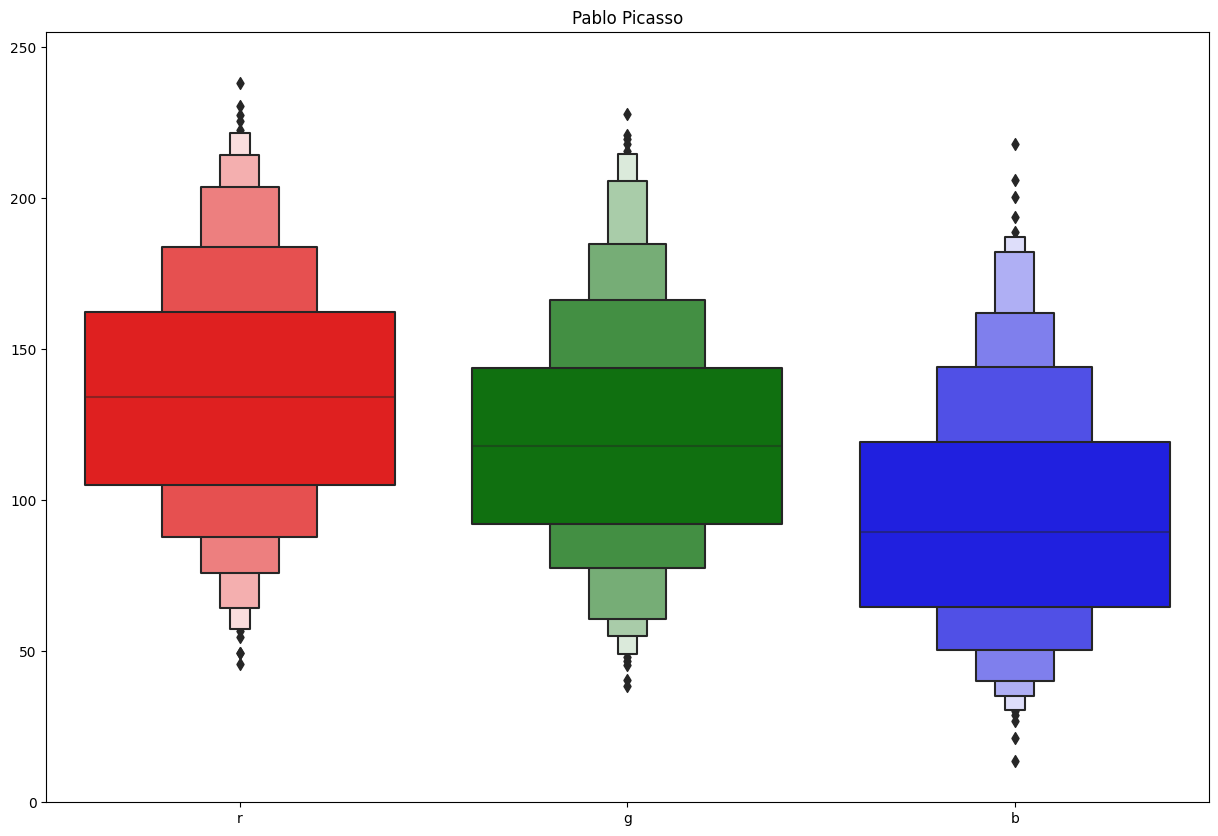

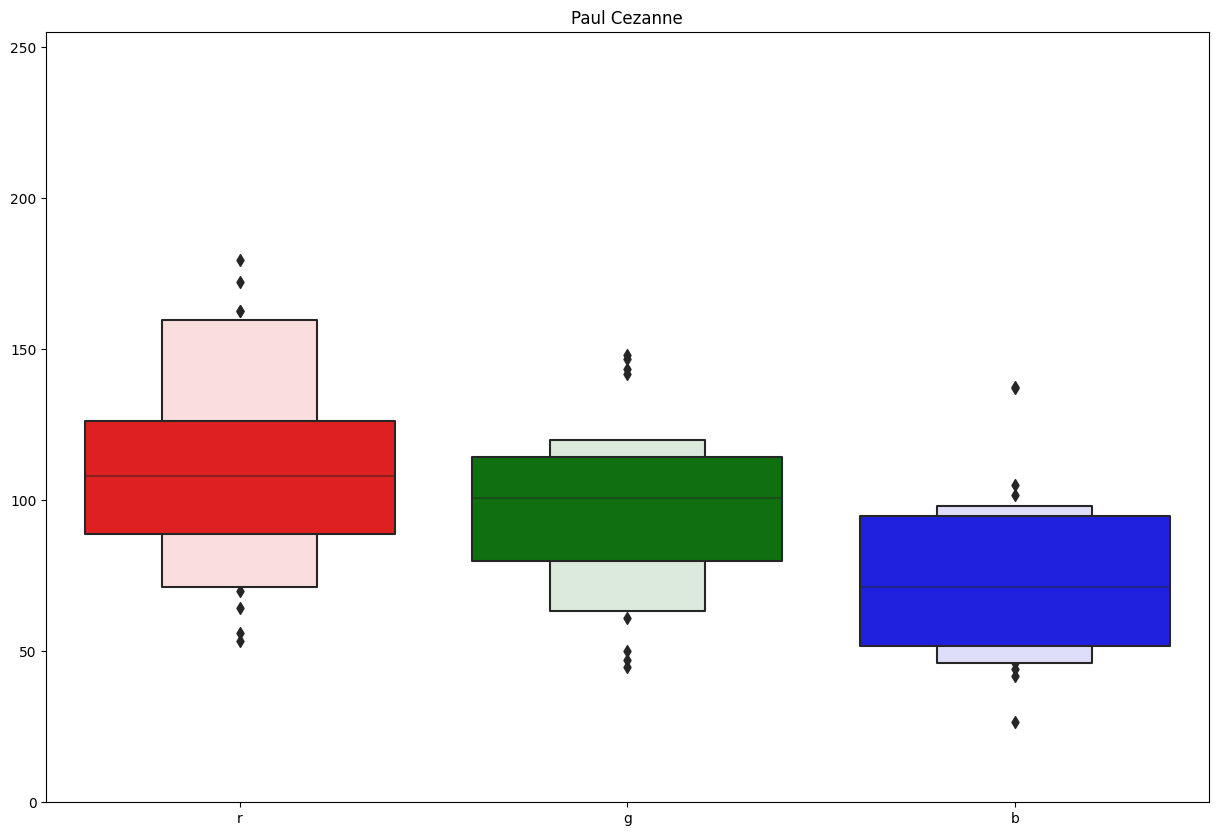

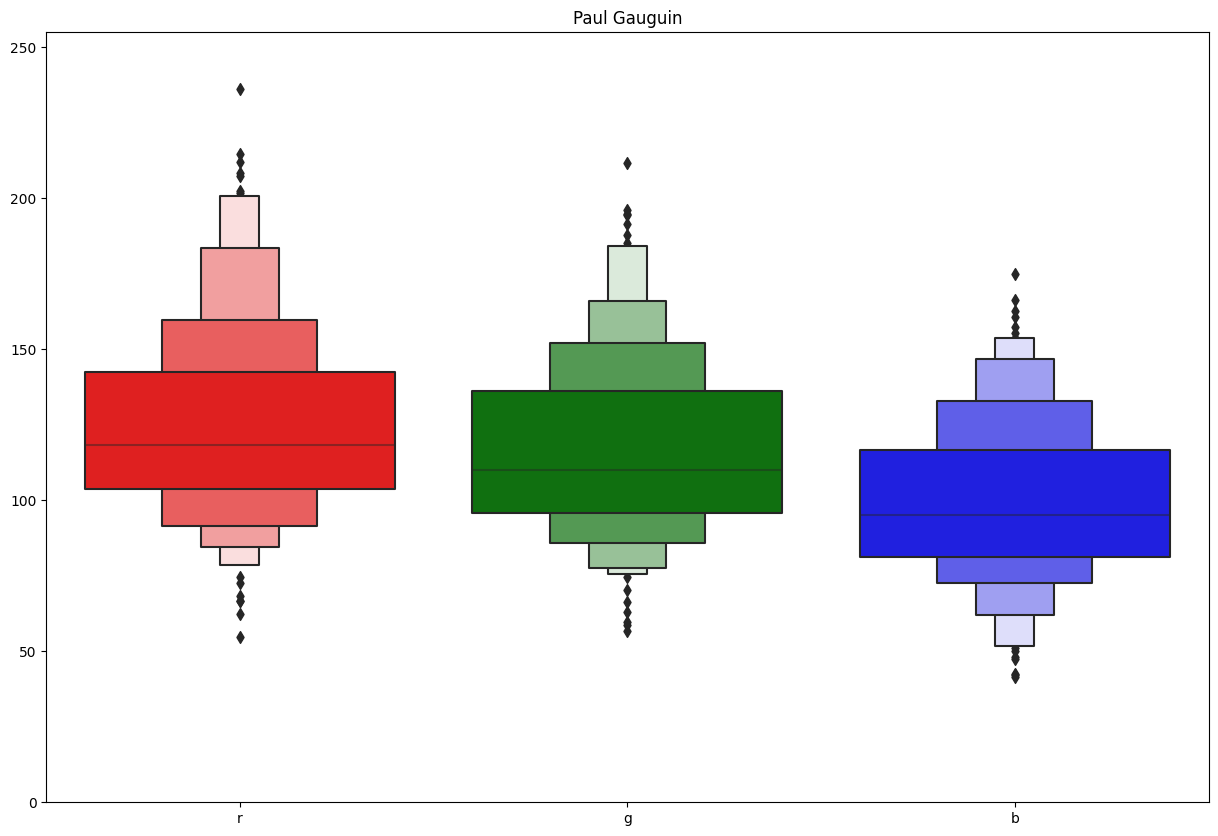

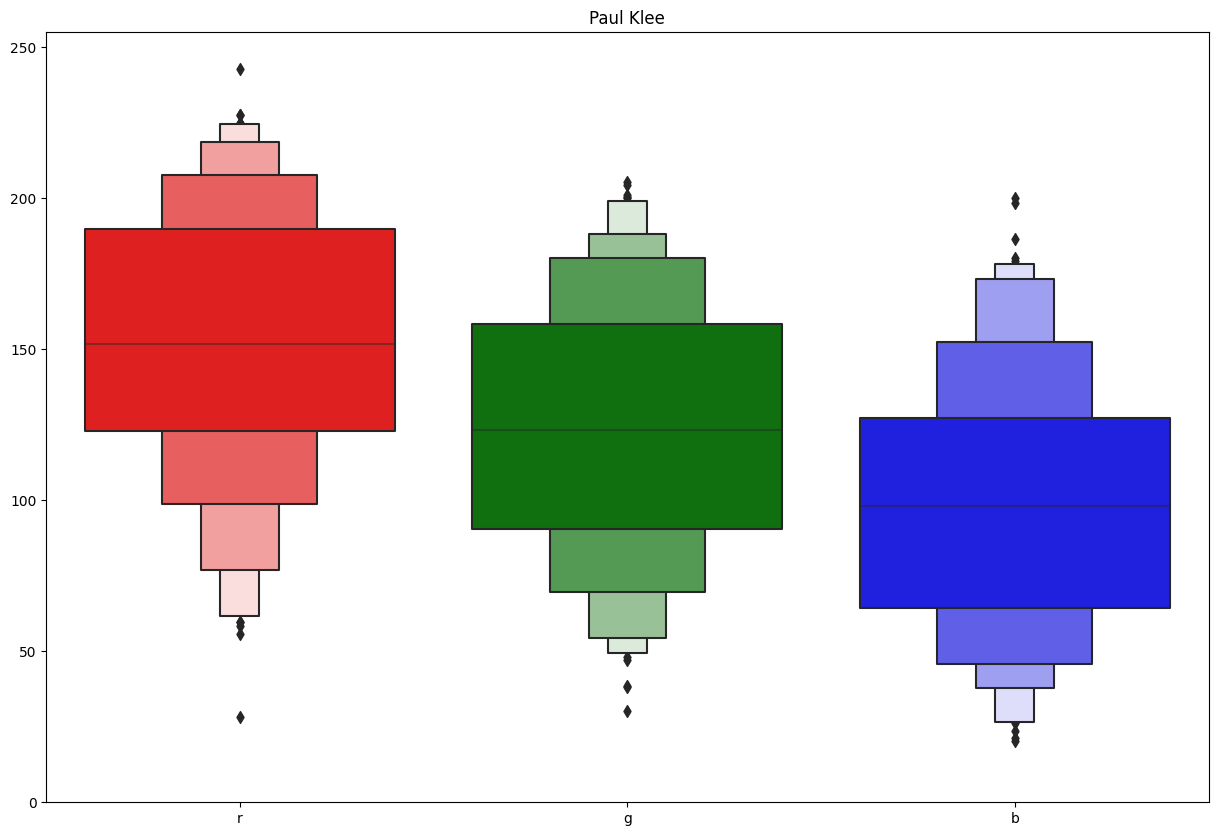

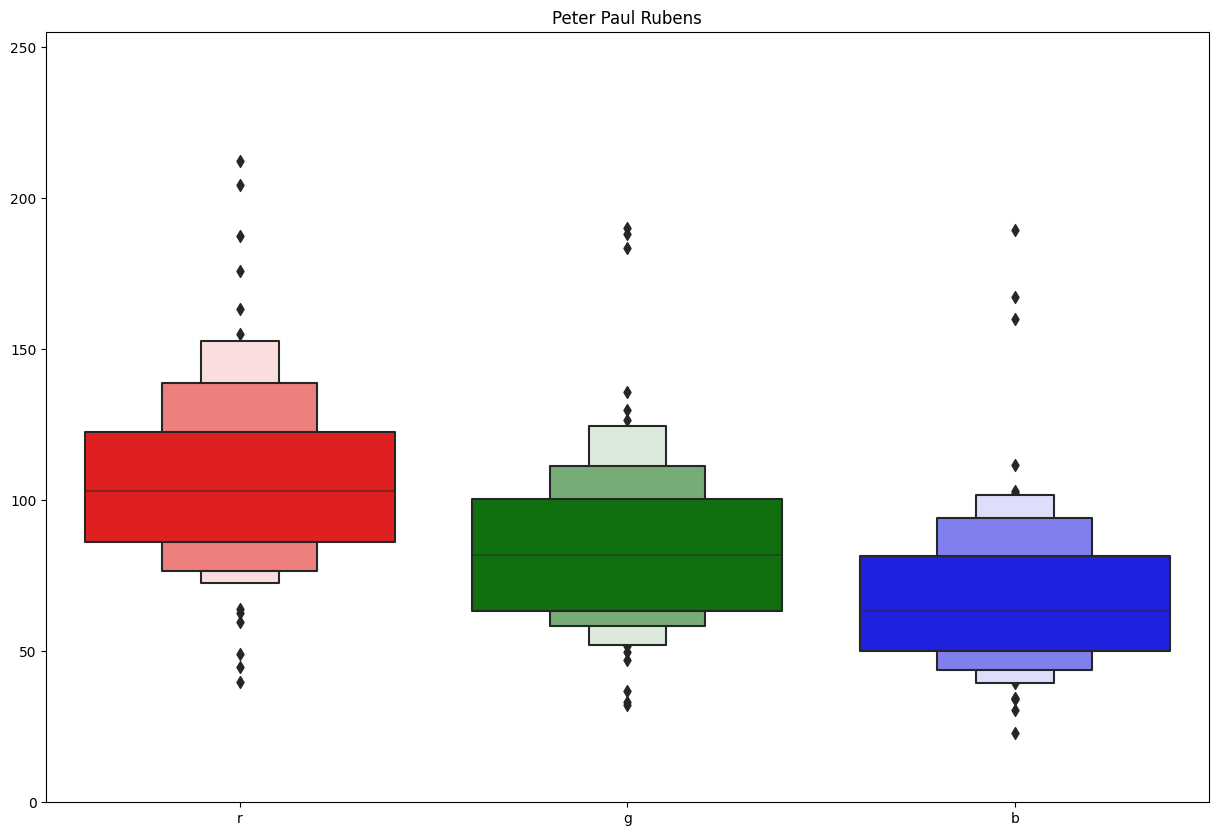

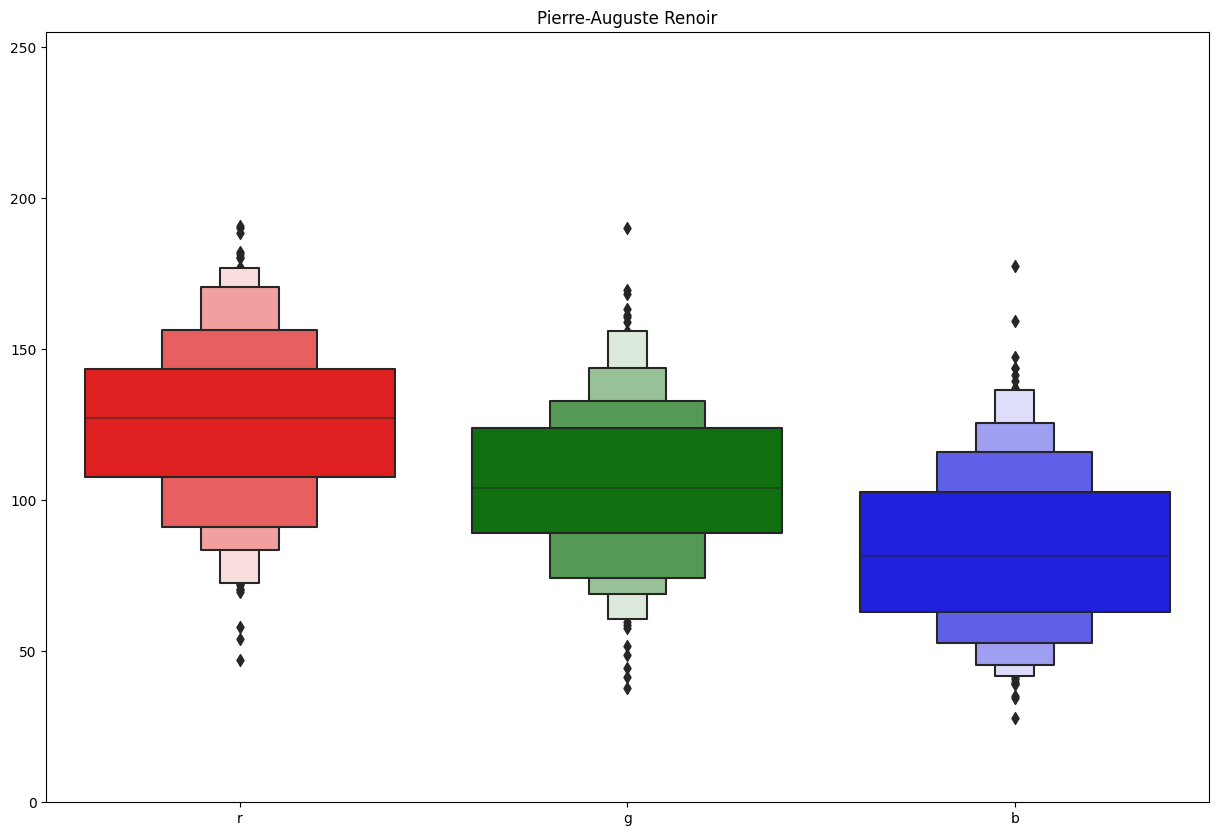

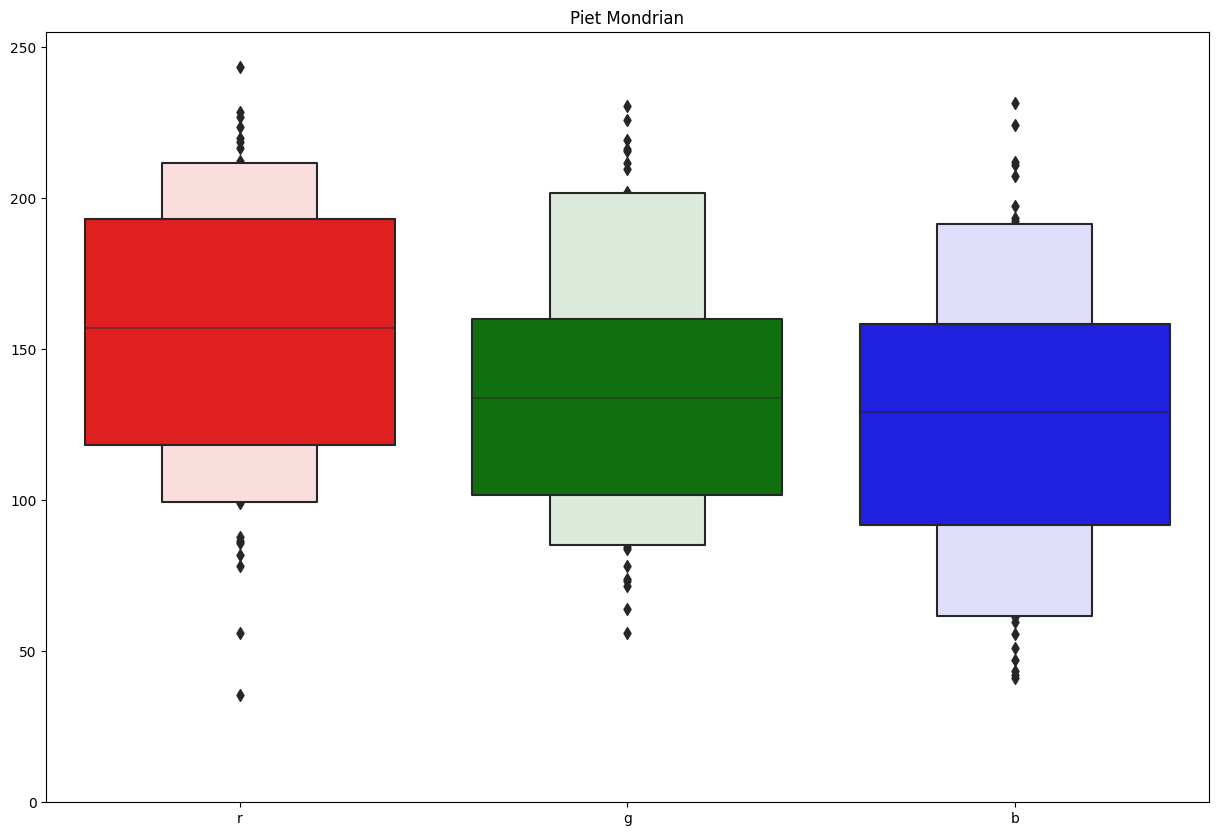

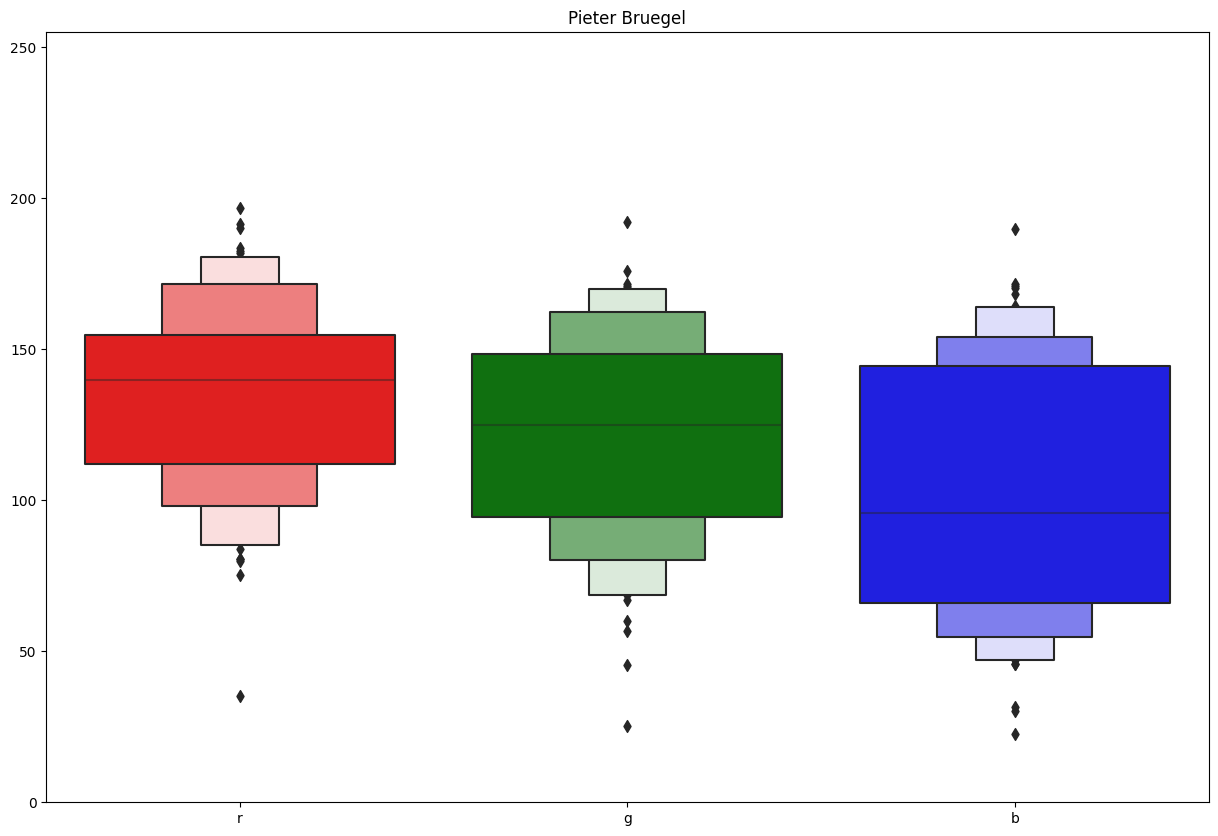

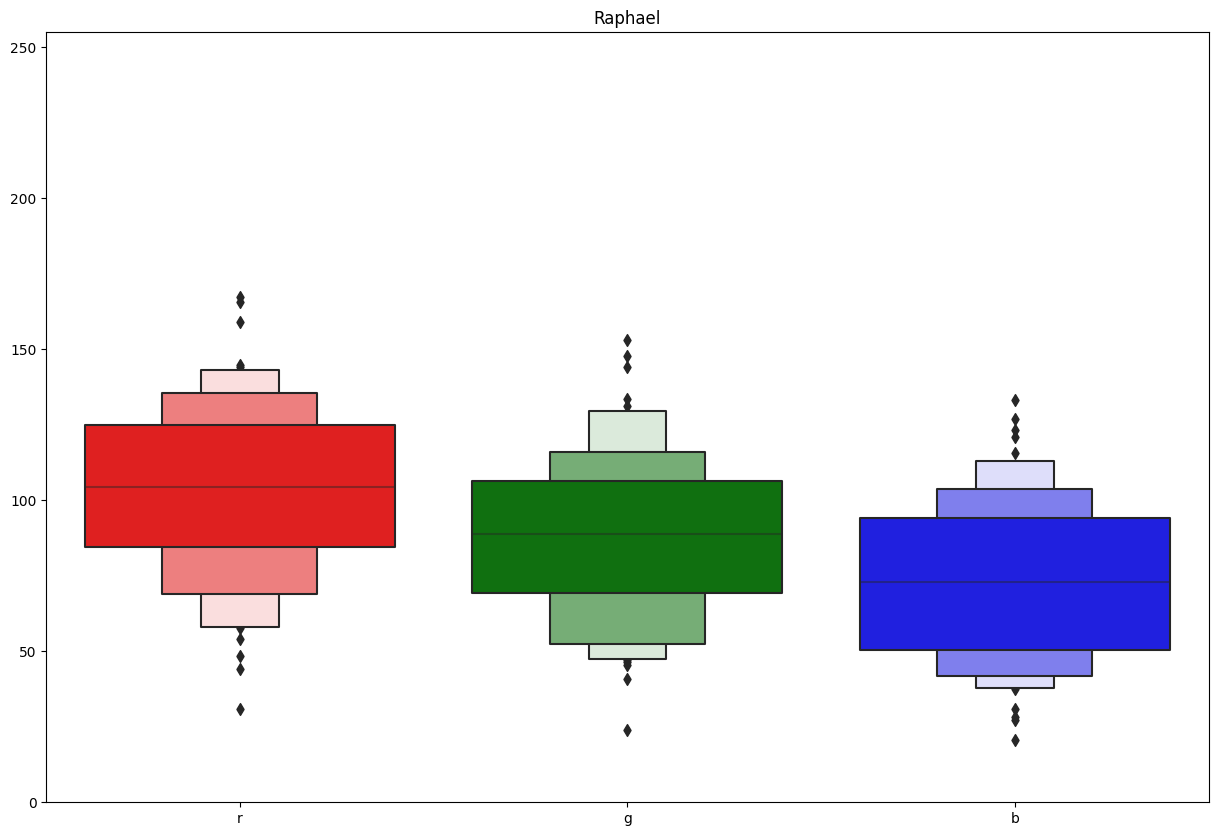

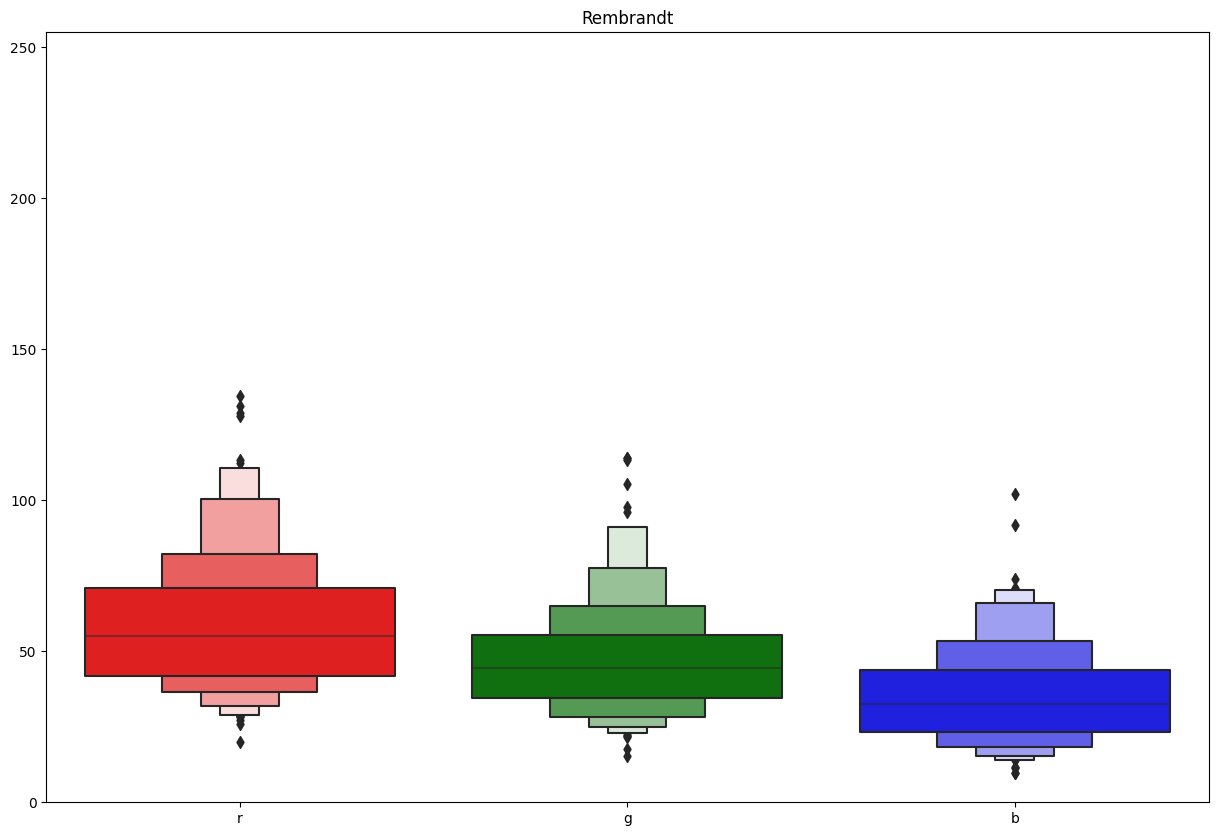

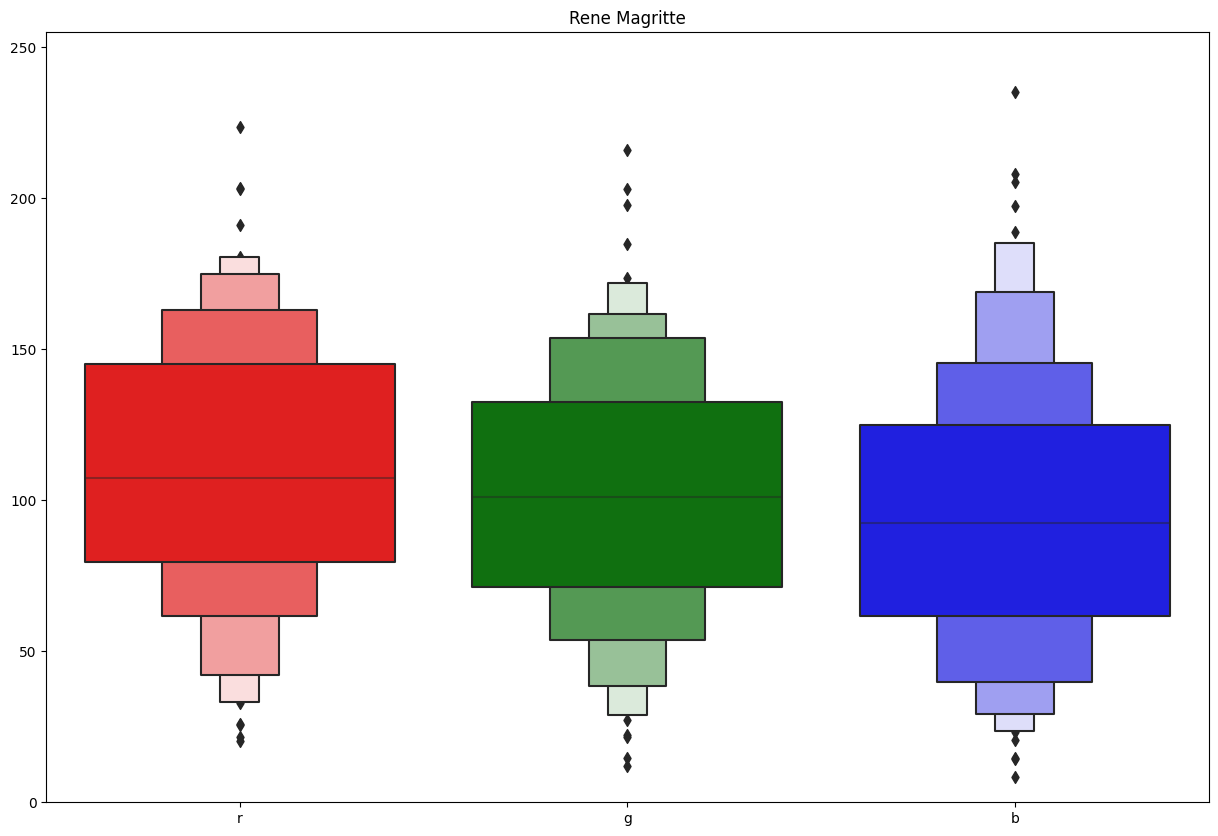

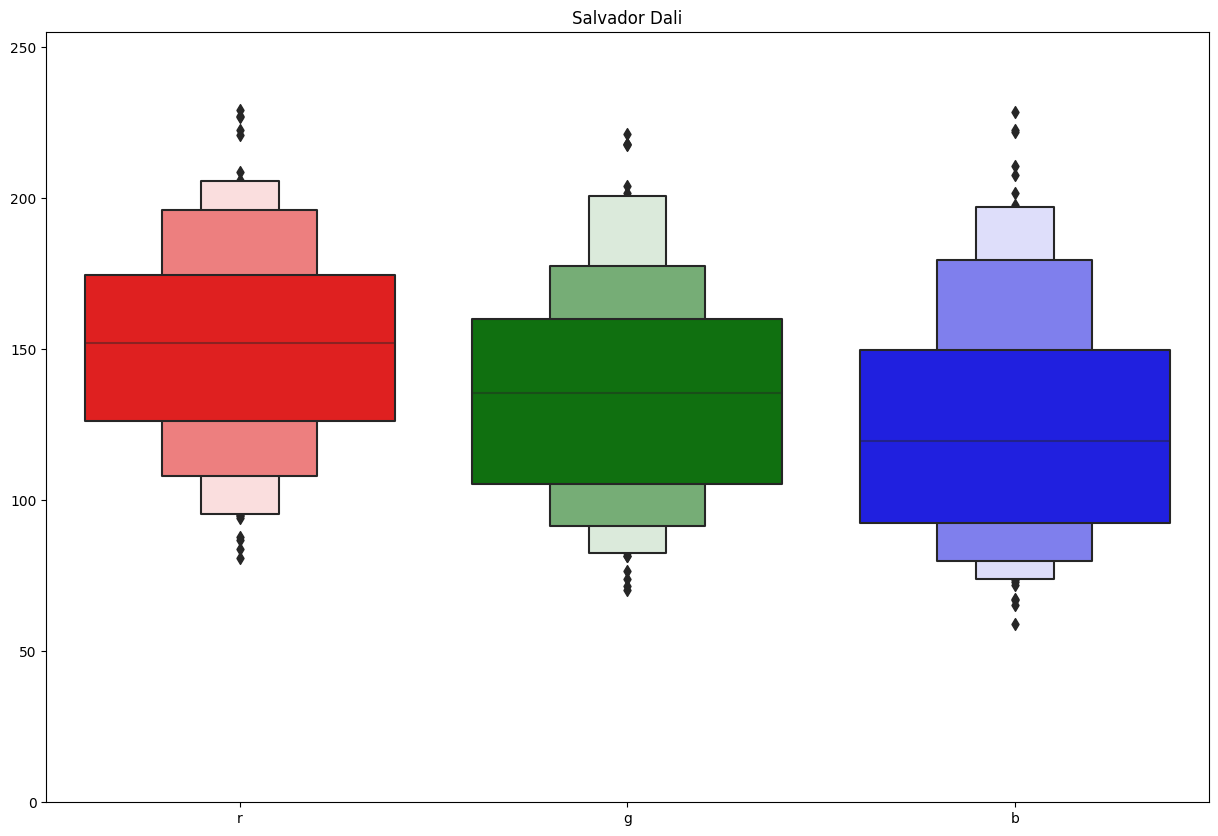

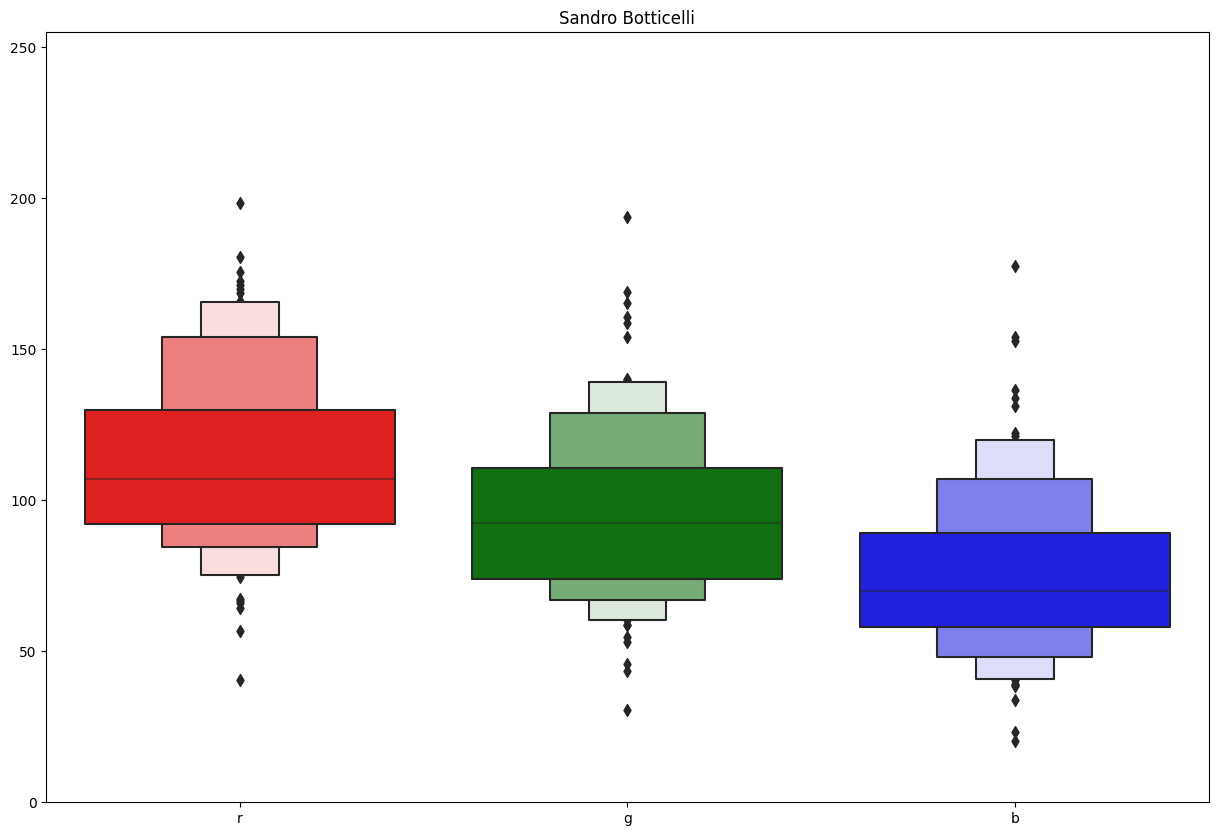

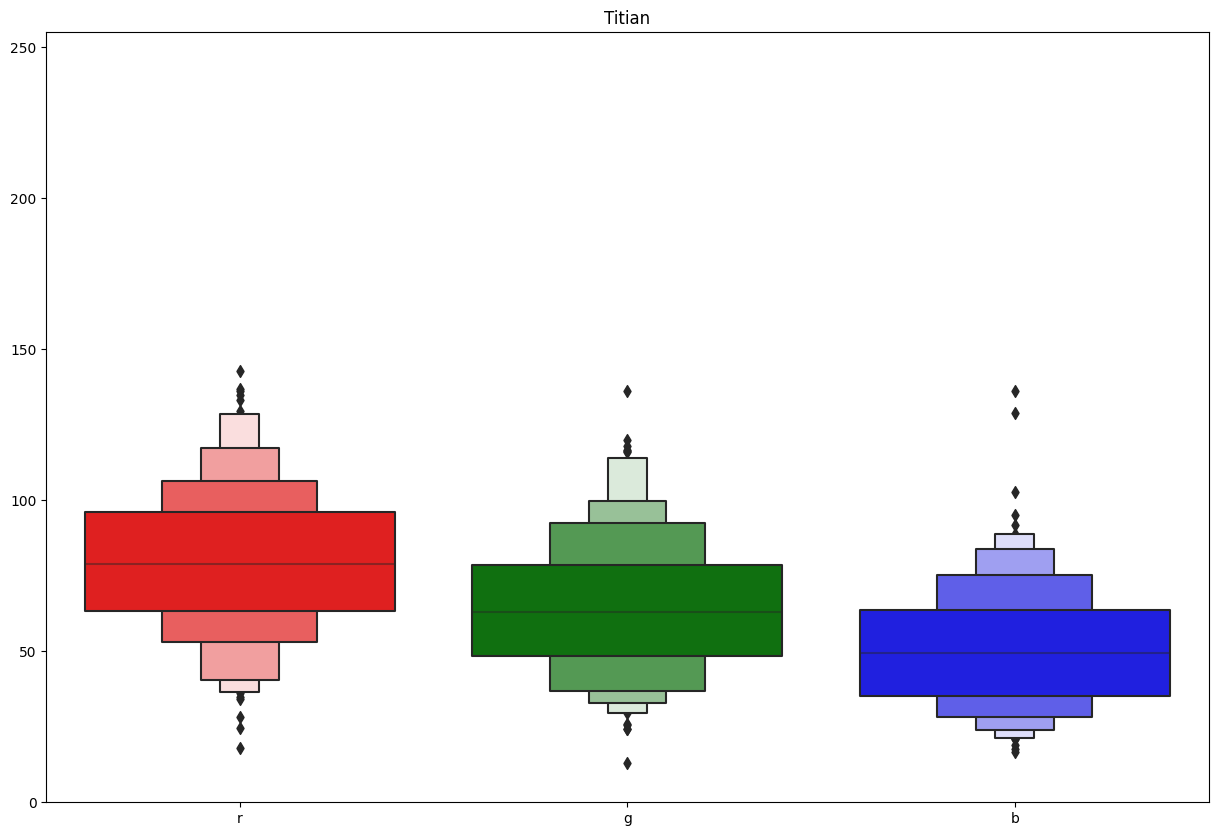

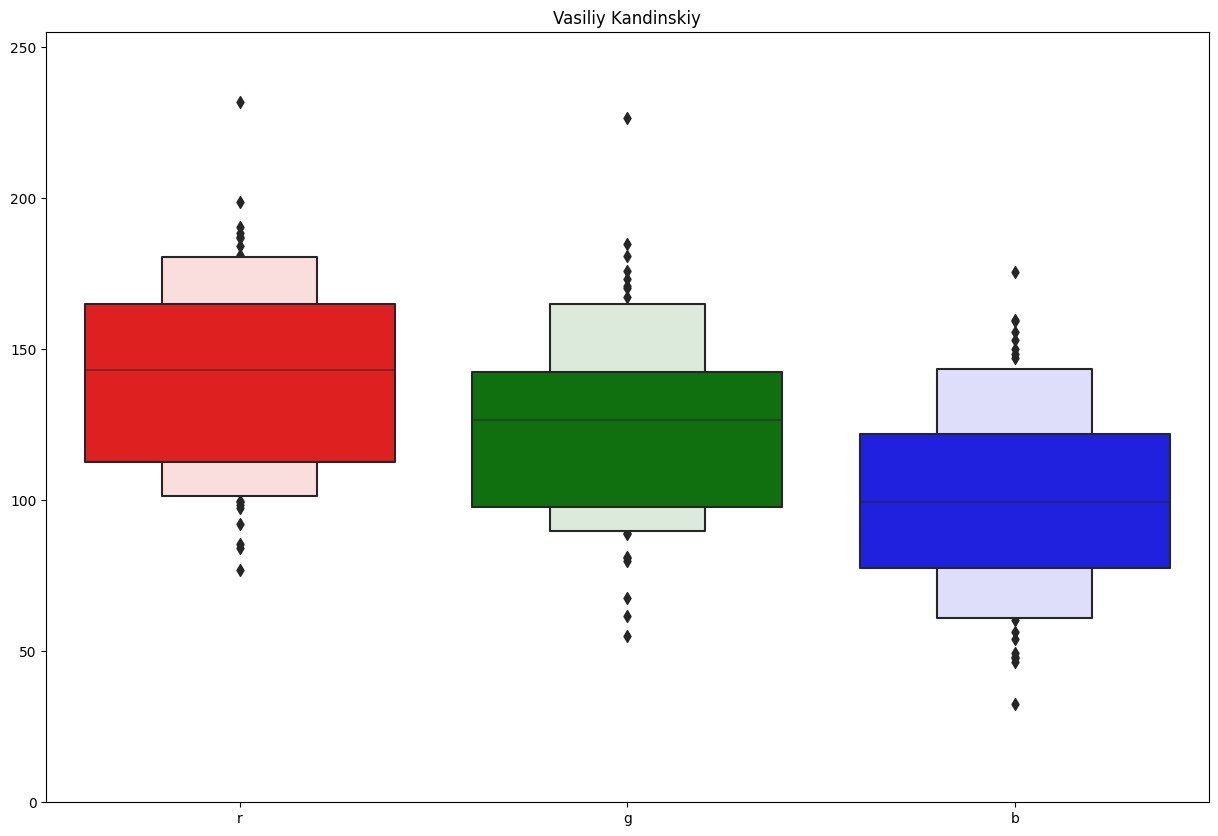

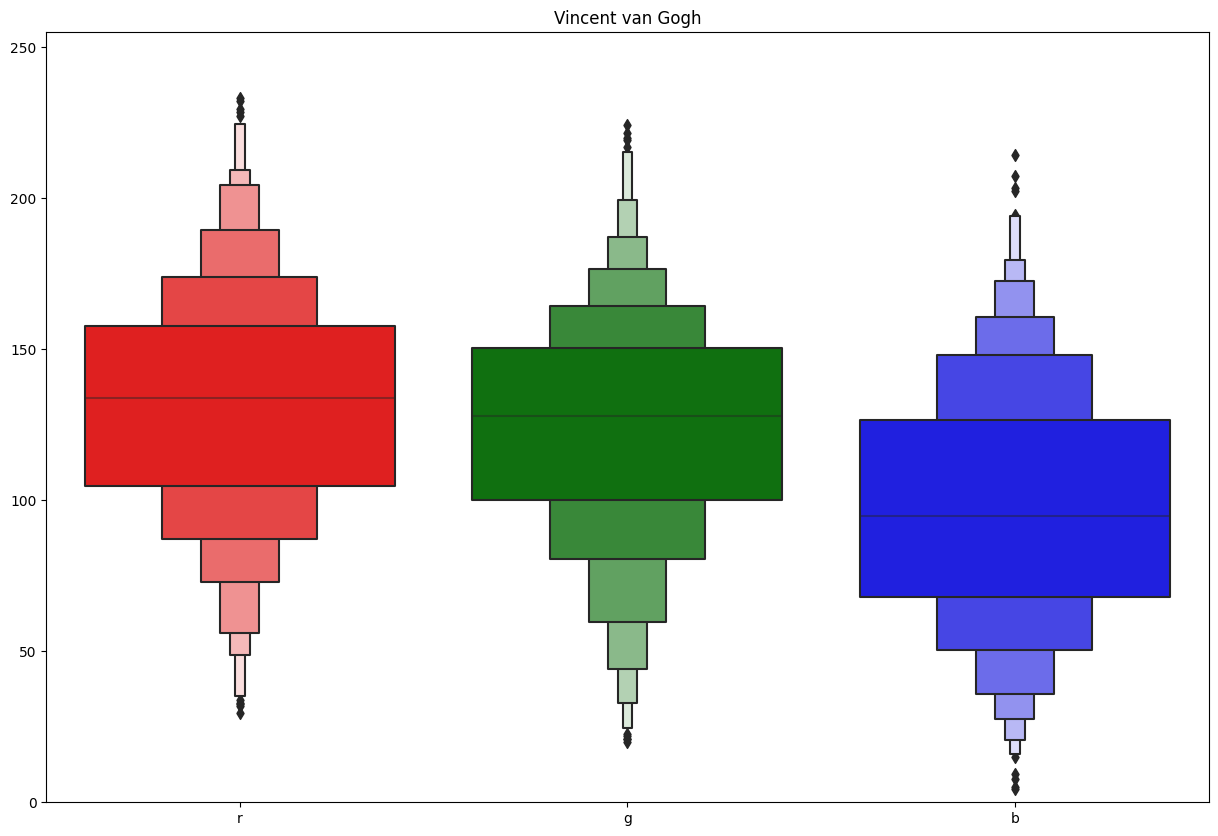

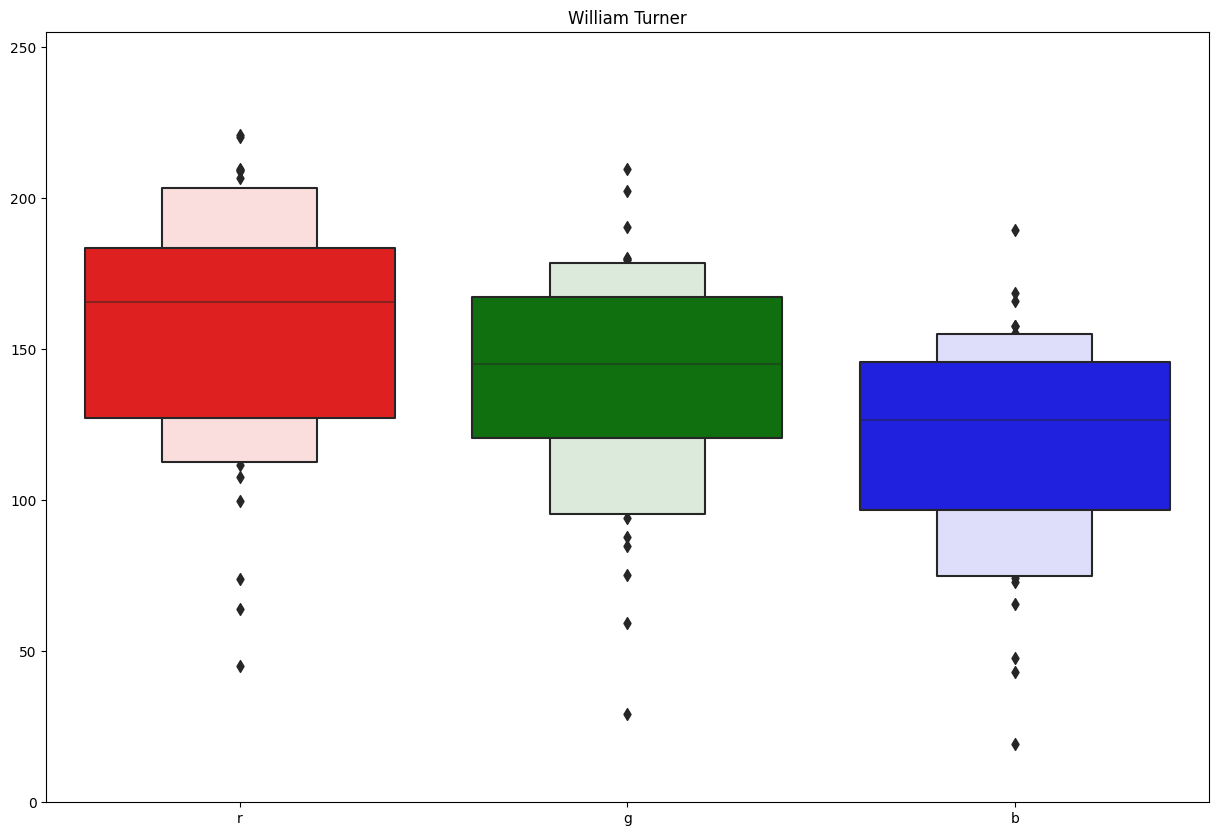

In [52]:
for i, (name, rgb) in enumerate(rgb_dict.items()):
    fig = plt.figure(figsize=(15, 10))
    tmp = pd.DataFrame.from_dict(rgb)
    my_pal = {'r': 'r', 'g': 'g', 'b': 'b'}
    ax = sns.boxenplot(data=tmp, palette=my_pal)
    ax.set_label(['r', 'g', 'b'])
    ax.set_title(f'{name}')
    ax.set_ylim(0, 255)
    plt.show()
    